# Store Sales Average Model
---
Notebook ini merupakan studi mengenai hubungan antara Jenis Bangunan, Kelas Bangunan, Lokasi Kabupaten/Kota dan Luas Area Toko dalam men-generate penjualan per bulan di PT Prestasi Retail Innovation.
- Jenis Bangunan: Merupakan satu dari tiga tipe bangunan diantaranya Mall (M), Ruko (R) dan Bangunan Sendiri (S)
- Kelas Bangunan: Merupakan kelas dari tipe bangunan tersebut dalam men-generate sales. Misalkan Mall Grand Indonesia adalah Mall Kelas 1 (M1) sedangkan Gandaria City adalah Mall Kelas 4 (M4). Berikut adalah Kelas Bangunan yang ada.
  - Mall Kelas 1 (M1)
  - Mall Kelas 2 (M2)
  - Mall Kelas 3 (M3)
  - Mall Kelas 4 (M4)
  - Mall Kelas 5 (M5)
  - Ruko Kelas 1 (R1)
  - Ruko Kelas 2 (R2)
  - Ruko Kelas 3 (R3)
  - Ruko Kelas 4 (R4)
  - Ruko Kelas 5 (R5)
  - Bangunan Sendiri Kelas 1 (S1)
  - Bangunan Sendiri Kelas 2 (S2)
  - Bangunan Sendiri Kelas 3 (S3)
  - Bangunan Sendiri Kelas 4 (S4)
  - Bangunan Sendiri Kelas 5 (S5)
- Lokasi Kabupaten/Kota adalah lokasi geografis dari toko
- Luas Area Toko adalah luas meter persegi dari toko
---
Studi ini akan menggunakan Regresi Linear dalam merumuskan nilai Average Sales ($y$) yang dipengaruhi oleh variabel - variabel independen lainnya seperti Jenis Bangunan $x{_1}$, Kelas Bangunan $x{_2}$, Lokasi Kabupaten/Kota ($x{_3}$) dan Luas Area Toko ($x{_4}$). Berikut adalah formulasi Regresi Linear untuk permasalahan tersebut:  
  
$
y = ax{_1} + bx{_2} + cx{_3} + dx{_4} + e
$  
  
Dimana:  
$y$ = Prediksi Average Sales  
$x{_1}$ = Variabel independen mewakili Jenis Bangunan  
$x{_2}$ = Variabel independen mewakili Kelas Bangunan  
$x{_3}$ = Variabel independen mewakili Lokasi Kabupaten/Kota  
$x{_4}$ = Variabel independen mewakili Luas Area Toko  
$a$ = Koefisien variabel independen $x{_1}$  
$b$ = Koefisien variabel independen $x{_2}$  
$c$ = Koefisien variabel independen $x{_3}$  
$d$ = Koefisien variabel independen $x{_4}$  
$e$ = Bias dari Regresi Linear  

### Import Modul

In [1]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed # type: ignore
set_seed(2)
import os
from typing import Literal
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from joblib import dump
import lightgbm
import xgboost
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
sns.set()

### Versi Tensorflow

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices())

2.12.0-rc1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


### Format Tampilan DataFrame

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Eksplorasi Data
---

### Atribut Dasar Toko
Berikut adalah beberapa data atribut dasar toko yang saat ini dimiliki.

In [4]:
data_toko = pd.read_excel("PRI - Store Renov Rent.xlsx", sheet_name=0, header=0)
data_toko

d:\ProjectInGit\store_average_sales_model\env\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,DEPT CODE,STORE CODE,Tipe Bangunan,Kelas Bangunan,Kota Kabupaten,Kota Kabupaten 2,Tahun Data Populasi,Estimasi Populasi,Garis Lintang,Garis Bujur,sqm,STORE NAME,Masa Sewa,Nilai Sewa,Renovasi Opening
0,SALES-02-02-001,FF001,S,S5,NaN,Jakarta Barat,2019,2434511,-6.17,106.75,430.74,FISIK FOOTBALL DAAN MOGOT,01/01/2023 - 31/12/2023,"545,975,604.00",183000000
1,SALES-02-02-002,FF002,M,M1,NaN,Jakarta Pusat,2020,1056896,-6.19,106.83,128.43,FISIK FOOTBALL SENAYAN CITY,31/01/2023 - 30/01/2028,"6,457,737,000.00",733265000
2,SALES-02-02-003,FF003,M,M4,NaN,Jakarta Selatan,2020,2226812,-6.23,106.83,42.00,FISIK FOOTBALL GANDARIA CITY,25/05/2020 - 24/05/2023,"1,020,600,000.00",325387870
3,SALES-02-02-004,FF004,M,M2,NaN,Surabaya,2020,2874314,-7.24,112.74,64.18,FISIK FOOTBALL TUNJUNGAN PLAZA 3,01/06/2022 - 31/05/2027,"2,379,794,400.00",405000000
4,SALES-02-02-009,FF009,M,M1,NaN,Jakarta Pusat,2020,1056896,-6.19,106.83,125.67,FISIK FOOTBALL GRAND INDONESIA,07/06/2018 - 06/06/2023,"3,558,974,400.00",987453346
5,SALES-02-02-010,FF010,M,M2,NaN,Jakarta Selatan,2020,2226812,-6.23,106.83,101.03,FISIK FOOTBALL PONDOK INDAH MALL 3,09/04/2021 - 08/04/2026,"4,849,440,000.00",488037260
6,SALES-02-02-011,FF011,M,M5,NaN,Karawang,2020,307880,-6.31,107.29,100.00,FISIK FOOTBALL RESINDA PARK MALL,07/10/2022 - 06/10/2027,"1,410,000,000.00",535107700
7,SALES-02-02-012,FF012,M,M3,NaN,Bekasi,2021,2564940,-6.23,106.97,62.00,FISIK FOOTBALL - SUMMARECON MALL BEKASI,27/01/2023 - 26/01/2026,"1,348,903,530.00",457617500
8,SALES-02-01-997,FO001,S,S5,NaN,Jakarta Barat,2019,2434511,-6.17,106.75,86.70,FACTORY OUTLET DAAN MOGOT,01/01/2023 - 31/12/2023,"114,024,396.00",239000000
9,SALES-02-01-001,FS001,M,M4,NaN,Depok,2020,2056400,-6.39,106.83,118.00,FISIK SPORT MARGO CITY,29/11/2019 - 28/11/2024,"4,801,800,000.00",431595455


Karena kita tidak akan menggunakan semua kolom dalam data ini untuk kepentingan studi Store Sales Average, maka `data_toko` akan diringkas dan disusun ulang menjadi:

In [5]:
data_toko = data_toko[["STORE CODE", "STORE NAME", "Tipe Bangunan", "Kelas Bangunan", "Kota Kabupaten 2", "Estimasi Populasi", "sqm"]]
data_toko

,STORE CODE,STORE NAME,Tipe Bangunan,Kelas Bangunan,Kota Kabupaten 2,Estimasi Populasi,sqm
0,FF001,FISIK FOOTBALL DAAN MOGOT,S,S5,Jakarta Barat,2434511,430.74
1,FF002,FISIK FOOTBALL SENAYAN CITY,M,M1,Jakarta Pusat,1056896,128.43
2,FF003,FISIK FOOTBALL GANDARIA CITY,M,M4,Jakarta Selatan,2226812,42.00
3,FF004,FISIK FOOTBALL TUNJUNGAN PLAZA 3,M,M2,Surabaya,2874314,64.18
4,FF009,FISIK FOOTBALL GRAND INDONESIA,M,M1,Jakarta Pusat,1056896,125.67
5,FF010,FISIK FOOTBALL PONDOK INDAH MALL 3,M,M2,Jakarta Selatan,2226812,101.03
6,FF011,FISIK FOOTBALL RESINDA PARK MALL,M,M5,Karawang,307880,100.00
7,FF012,FISIK FOOTBALL - SUMMARECON MALL BEKASI,M,M3,Bekasi,2564940,62.00
8,FO001,FACTORY OUTLET DAAN MOGOT,S,S5,Jakarta Barat,2434511,86.70
9,FS001,FISIK SPORT MARGO CITY,M,M4,Depok,2056400,118.00


#### Luas Area Toko (sqm)

In [6]:
data_luas = data_toko["sqm"]
hitung, bin = np.histogram(data_luas)
print(hitung, bin)

[10 19 10  1  0  0  0  0  0  1] [ 42.     80.874 119.748 158.622 197.496 236.37  275.244 314.118 352.992
 391.866 430.74 ]


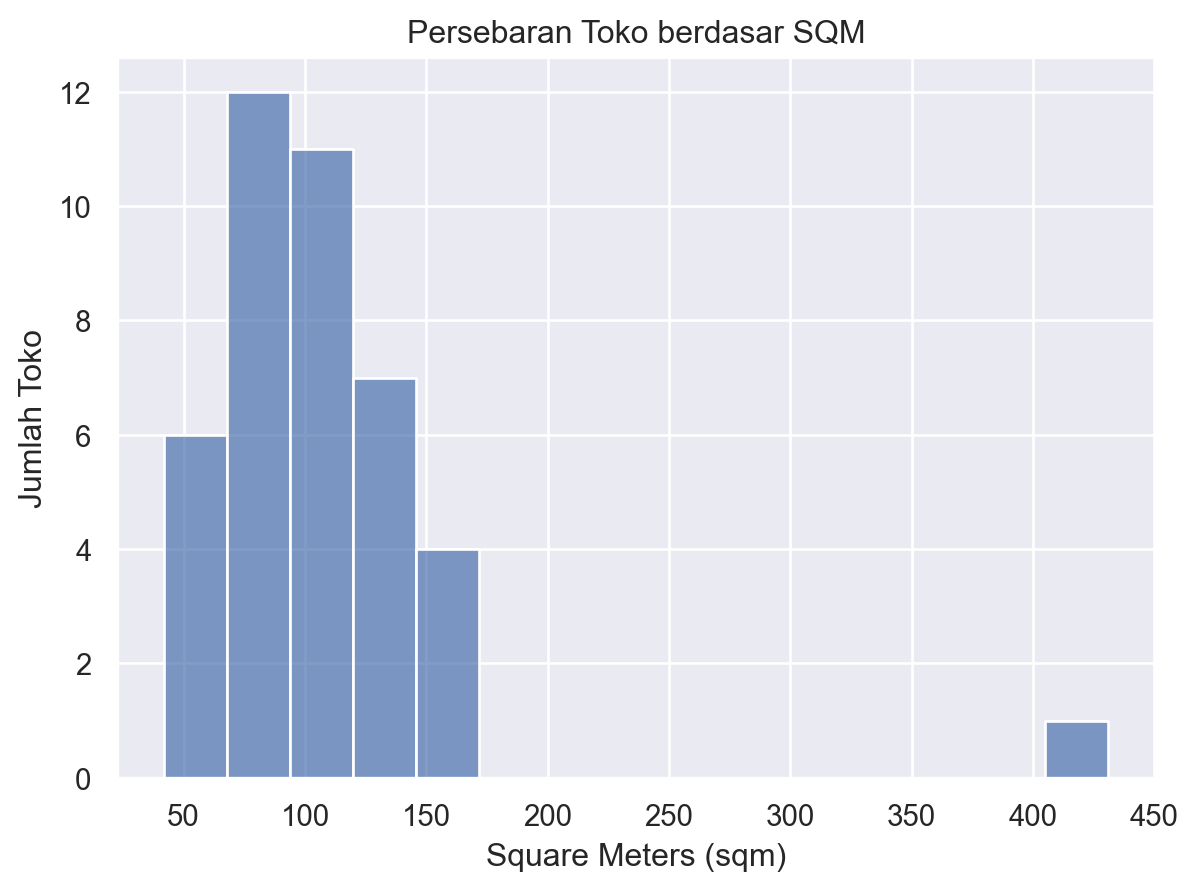

In [7]:
plot = so.Plot(data_toko, "sqm")
plot.add(so.Bars(), so.Hist(), legend=True).label(title="Persebaran Toko berdasar SQM", x="Square Meters (sqm)", y="Jumlah Toko")

Berdasarkan luasnya (sqm), kita dapat melihat pada fungsi `histogram` di atas bahwa distribusi persebaran luas toko cukup normal dengan 29 Toko jatuh ke dalam kategori `sqm` di antara $75m{^2}$ sampai dengan $150m{^2}$, dengan 1 toko yang menjadi outlier dari distribusi dimana luas toko > $400m{^2}$.

#### Penjualan
---
Mengingat bahwa data *historical* yang dimiliki terbatas dari tahun 2018 sampai dengan November 2022, serta mengingat bahwa kita mengalami periode pandemi CoV-19 selama lebih dari 1 tahun, maka penulis merasa perlu untuk melakukan separasi data penjualan per bulan menggunakan flag `Pandemic`.
  
Berikut adalah sepenggal data penjualan *historical* per toko dari tahun 2018 sampai dengan November 2022 (40 baris data awal).

In [8]:
data_penjualan = pd.read_excel("PRI - Store Renov Rent.xlsx", sheet_name="Sales", header=0)
data_penjualan

,LocationCode,EOM,Sales
0,FF001,2018-01-31,"759,428,480.00"
1,FF001,2018-02-28,"790,592,710.00"
2,FF001,2018-03-31,"1,111,240,174.00"
3,FF001,2018-04-30,"992,088,740.00"
4,FF001,2018-05-31,"726,303,940.00"
...,...,...,...
2281,OD018,2022-11-30,"423,566,574.00"
2282,OD019,2022-08-31,"851,385,100.00"
2283,OD019,2022-09-30,"750,082,600.00"
2284,OD019,2022-10-31,"655,444,430.00"


Berikut adalah grouping data penjualan *historical* yang disimpan dalam variabel `data_penjualan_by_month`.

In [9]:
data_penjualan_by_month = data_penjualan.groupby(["EOM"]).sum(numeric_only=True)
data_penjualan_by_month

,Sales
EOM,
2018-01-31,"12,103,514,471.31"
2018-02-28,"12,492,473,889.00"
2018-03-31,"16,265,385,724.00"
2018-04-30,"14,794,870,800.00"
2018-05-31,"15,041,542,590.00"
2018-06-30,"23,667,969,042.00"
2018-07-31,"19,243,903,205.00"
2018-08-31,"19,449,309,589.00"
2018-09-30,"19,707,916,100.00"


Untuk melihat trend pergerakan penjualan dalam kurun waktu ini, kita akan menggunakan `Simple Moving Average` yang akan menghitung rerata secara bergulung untuk interval waktu ke belakang (contoh: Moving Average 3 Bulan untuk Mei 2021 adalah rata - rata penjualan yang merupakan rata - rata dari penjualan di bulan Maret 2021, April 2021 dan Mei 2021).  
Namun satu `Moving Average` saja tidak dapat menggambarkan sebuah trend, karena itu kita juga akan menggunakan tambahan 2 interval `Moving Average` lainnya untuk menggambarkan trend pada jangka pendek, jangka menengah dan jangka panjang.  
Dalam studi ini kita akan menggunakan 3 `Simple Moving Average` yaitu:
* `MA3`: `Moving Average` dengan jendela periode 3 bulan ke belakang (Jangka Pendek)
* `MA6`: `Moving Average` dengan jendela periode 6 bulan ke belakang (Jangka Menengah)
* `MA12`: `Moving Average` dengan jendela periode 12 bulan atau 1 tahun ke belakang (Jangka Panjang)  
Berikut adalah `data_penjualan_by_month` dengan penambahan kolom `MA3`, `MA6` dan `MA12` yang didapat dengan menggunakan fungsi `rolling()` dari `pd.DataFrame` yang dirata-ratakan dengan fungsi `mean()`.

In [10]:
data_penjualan_by_month["MA3"] = data_penjualan_by_month["Sales"].rolling(3).mean()
data_penjualan_by_month["MA6"] = data_penjualan_by_month["Sales"].rolling(6).mean()
data_penjualan_by_month["MA12"] = data_penjualan_by_month["Sales"].rolling(12).mean()
data_penjualan_by_month

,Sales,MA3,MA6,MA12
EOM,,,,
2018-01-31,"12,103,514,471.31",NaN,NaN,NaN
2018-02-28,"12,492,473,889.00",NaN,NaN,NaN
2018-03-31,"16,265,385,724.00","13,620,458,028.10",NaN,NaN
2018-04-30,"14,794,870,800.00","14,517,576,804.33",NaN,NaN
2018-05-31,"15,041,542,590.00","15,367,266,371.33",NaN,NaN
2018-06-30,"23,667,969,042.00","17,834,794,144.00","15,727,626,086.05",NaN
2018-07-31,"19,243,903,205.00","19,317,804,945.67","16,917,690,875.00",NaN
2018-08-31,"19,449,309,589.00","20,787,060,612.00","18,077,163,491.67",NaN
2018-09-30,"19,707,916,100.00","19,467,042,964.67","18,650,918,554.33",NaN


Berikut adalah grafik penjualan *historical* dari tahun 2018 sampai dengan November 2022.

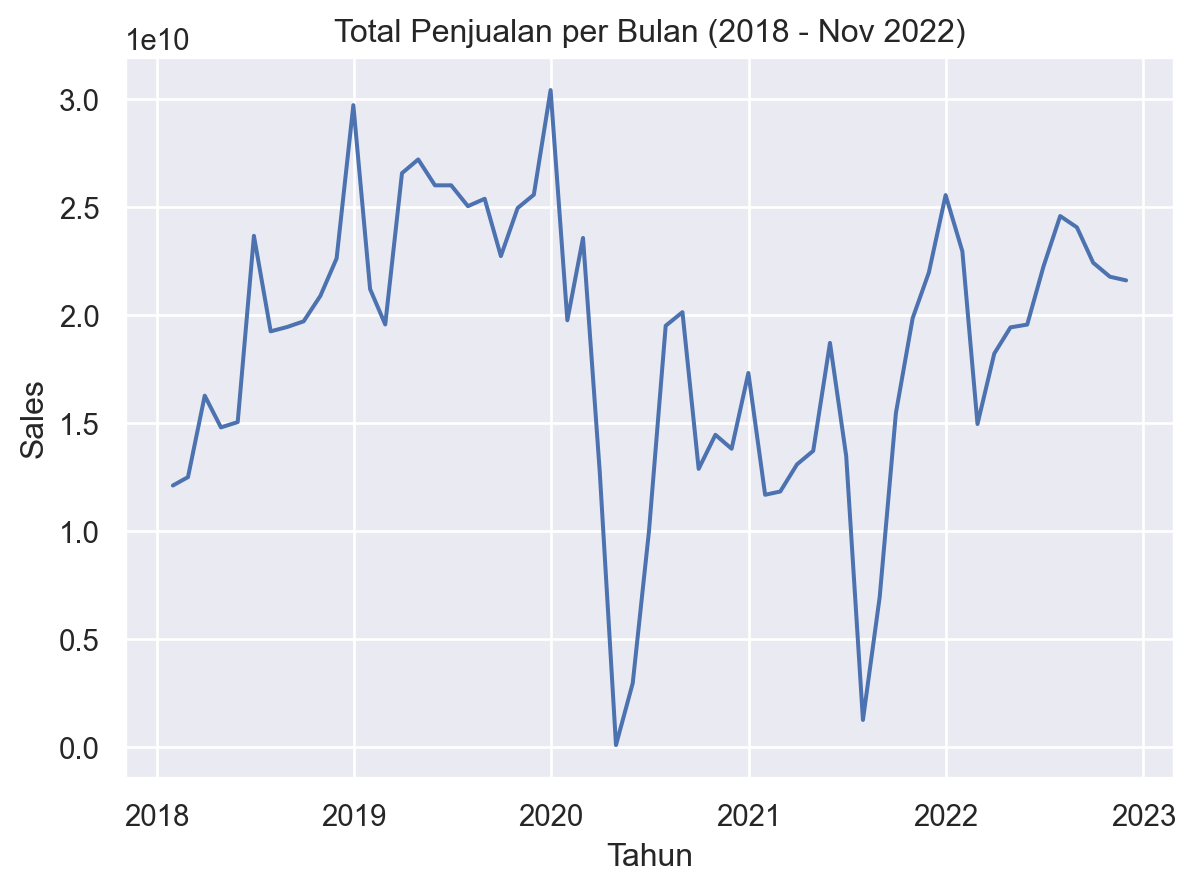

In [11]:
garis_plot = so.Plot(data_penjualan_by_month, "EOM", "Sales")
garis_plot.add(so.Line()).label(title="Total Penjualan per Bulan (2018 - Nov 2022)", x="Tahun")

Berikut adalah grafik `Moving Average` untuk data penjualan *historical* dari tahun 2018 sampai dengan November 2022.

In [12]:
print(data_penjualan_by_month.reset_index())

          EOM             Sales               MA3               MA6  \
0  2018-01-31 12,103,514,471.31               NaN               NaN   
1  2018-02-28 12,492,473,889.00               NaN               NaN   
2  2018-03-31 16,265,385,724.00 13,620,458,028.10               NaN   
3  2018-04-30 14,794,870,800.00 14,517,576,804.33               NaN   
4  2018-05-31 15,041,542,590.00 15,367,266,371.33               NaN   
5  2018-06-30 23,667,969,042.00 17,834,794,144.00 15,727,626,086.05   
6  2018-07-31 19,243,903,205.00 19,317,804,945.67 16,917,690,875.00   
7  2018-08-31 19,449,309,589.00 20,787,060,612.00 18,077,163,491.67   
8  2018-09-30 19,707,916,100.00 19,467,042,964.67 18,650,918,554.33   
9  2018-10-31 20,887,760,437.00 20,014,995,375.33 19,666,400,160.50   
10 2018-11-30 22,621,380,424.00 21,072,352,320.33 20,929,706,466.17   
11 2018-12-31 29,720,070,585.00 24,409,737,148.67 21,938,390,056.67   
12 2019-01-31 21,199,589,765.00 24,513,680,258.00 22,264,337,816.67   
13 201

In [13]:
data_kolom_melt = pd.melt(data_penjualan_by_month.reset_index().drop(columns=["Sales"]), id_vars='EOM', var_name="Tipe MA", value_name="Nilai") # type: ignore
data_kolom_melt

,EOM,Tipe MA,Nilai
0,2018-01-31,MA3,NaN
1,2018-02-28,MA3,NaN
2,2018-03-31,MA3,"13,620,458,028.10"
3,2018-04-30,MA3,"14,517,576,804.33"
4,2018-05-31,MA3,"15,367,266,371.33"
...,...,...,...
172,2022-07-31,MA12,"19,308,549,927.42"
173,2022-08-31,MA12,"20,735,126,598.42"
174,2022-09-30,MA12,"21,315,622,973.00"
175,2022-10-31,MA12,"21,475,637,002.83"


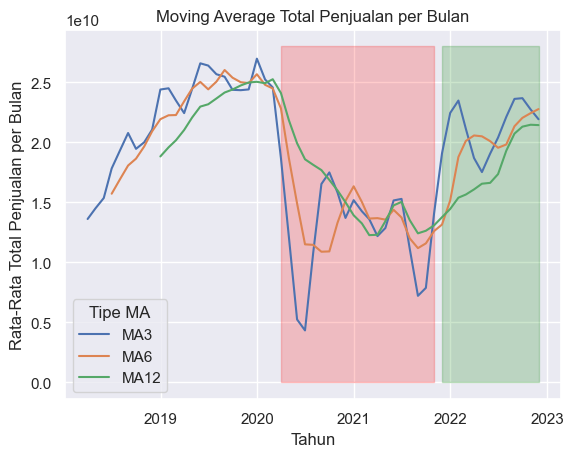

In [14]:
# plt.plot(data_penjualan_by_month["MA3"], color="green", label="MA3")
# plt.plot(data_penjualan_by_month["MA6"], color="orange", label="MA6")
# plt.plot(data_penjualan_by_month["MA12"], color="red", label="MA12")
# plt.show()
fig, ax = plt.subplots()
ax.set_title("Moving Average Total Penjualan per Bulan")
ax.set_ylabel("Rata-Rata Total Penjualan per Bulan")
ax.set_xlabel("Tahun")
# Plot Moving Average
sns.lineplot(data_kolom_melt, x="EOM", y="Nilai", hue="Tipe MA")
# Region Section Pandemic
ax.fill_between(data_penjualan_by_month.index.values, 0, 28000000000, where=((data_penjualan_by_month.index.values > np.datetime64('2020-02-29')) & (data_penjualan_by_month.index.values <= np.datetime64('2021-10-31'))), color="red", alpha=0.2)
# Region Section Recovery
ax.fill_between(data_penjualan_by_month.index.values, 0, 28000000000, where=((data_penjualan_by_month.index.values >= np.datetime64('2021-11-01')) & (data_penjualan_by_month.index.values <= np.datetime64('2022-12-31'))), color="green", alpha=0.2)
plt.show()

Pada grafik di atas kita dapat melihat bahwa terdapat tren penurunan penjualan (terkonfirmasi dengan `MA3` yang turun ke bawah `MA6` dan `MA12`) pada periode Maret 2020 (`Pandemic`) dan nilai rata - rata penjualan ini bertahan cukup rendah hingga setidaknya sampai dengan bulan Oktober 2021 dan di bulan November 2021 hingga seterusnya kita dapat melihat nilai rata-rata penjualan per bulan yang meningkat (`Recovery`, terkonfirmasi dengan `MA3` yang melewati dan bertahan di atas `MA6` dan `MA12`).  
  
Oleh karena itu kita akan mengkategorikan penjualan yang terjadi diantara bulan Maret 2020 - Oktober 2021 sebagai penjualan dalam masa `Pandemic` dan lainnya sebagai penjualan `Normal`.

In [15]:
pandemic_period = [
  np.datetime64('2020-03-31'),
  np.datetime64('2020-04-30'),
  np.datetime64('2020-05-31'),
  np.datetime64('2020-06-30'),
  np.datetime64('2020-07-31'),
  np.datetime64('2020-08-31'),
  np.datetime64('2020-09-30'),
  np.datetime64('2020-10-31'),
  np.datetime64('2020-11-30'),
  np.datetime64('2020-12-31'),
  np.datetime64('2021-01-31'),
  np.datetime64('2021-02-28'),
  np.datetime64('2021-03-31'),
  np.datetime64('2021-04-30'),
  np.datetime64('2021-05-31'),
  np.datetime64('2021-06-30'),
  np.datetime64('2021-07-31'),
  np.datetime64('2021-08-31'),
  np.datetime64('2021-09-30'),
  np.datetime64('2021-10-31'),
  ]
print(pandemic_period)

[numpy.datetime64('2020-03-31'), numpy.datetime64('2020-04-30'), numpy.datetime64('2020-05-31'), numpy.datetime64('2020-06-30'), numpy.datetime64('2020-07-31'), numpy.datetime64('2020-08-31'), numpy.datetime64('2020-09-30'), numpy.datetime64('2020-10-31'), numpy.datetime64('2020-11-30'), numpy.datetime64('2020-12-31'), numpy.datetime64('2021-01-31'), numpy.datetime64('2021-02-28'), numpy.datetime64('2021-03-31'), numpy.datetime64('2021-04-30'), numpy.datetime64('2021-05-31'), numpy.datetime64('2021-06-30'), numpy.datetime64('2021-07-31'), numpy.datetime64('2021-08-31'), numpy.datetime64('2021-09-30'), numpy.datetime64('2021-10-31')]


Berikut adalah pengkategorian bulan penjualan berdasarkan periode `Pandemic` dan `Normal`

In [16]:
def status_pandemi(x):
  return "Pandemic" if x["EOM"] in pandemic_period else "Normal"

data_penjualan["Status Pandemi"] = data_penjualan.apply(lambda x: status_pandemi(x), axis=1)
data_penjualan

,LocationCode,EOM,Sales,Status Pandemi
0,FF001,2018-01-31,"759,428,480.00",Normal
1,FF001,2018-02-28,"790,592,710.00",Normal
2,FF001,2018-03-31,"1,111,240,174.00",Normal
3,FF001,2018-04-30,"992,088,740.00",Normal
4,FF001,2018-05-31,"726,303,940.00",Normal
...,...,...,...,...
2281,OD018,2022-11-30,"423,566,574.00",Normal
2282,OD019,2022-08-31,"851,385,100.00",Normal
2283,OD019,2022-09-30,"750,082,600.00",Normal
2284,OD019,2022-10-31,"655,444,430.00",Normal


Pembentukan dataframe `data_penjualan_rerata` untuk lookup nilai penjualan rata-rata pada masa pandemi dan normal di dataframe `data_toko`

In [17]:
data_penjualan_rerata = data_penjualan.groupby(['Status Pandemi', 'LocationCode']).mean(numeric_only=True)
data_penjualan_rerata

Sales
Status Pandemi LocationCode                 
Normal         FF001        1,238,492,576.00
               FF002          748,960,543.77
               FF003          386,429,562.72
               FF004          488,258,455.69
               FF005          250,215,410.19
...                                      ...
Pandemic       OD014          269,483,364.40
               OD015          435,205,358.74
               OD016          299,020,344.88
               OD017          436,089,789.53
               OD018          250,461,102.47

[103 rows x 1 columns]

Implementasi lookup rata-rata penjualan per bulan untuk setiap toko baik pada masa pandemi maupun pada masa normal di dataframe `data_toko`

In [18]:
data_rerata_penjualan = data_toko.copy()

def lookup_rerata(x, pandemi_status, lookup_df):
  try: 
    return sum(lookup_df.loc[pandemi_status, x['STORE CODE']].values)
  except:
    return np.NaN

data_rerata_penjualan["Rerata Penjualan Normal"] = data_rerata_penjualan.apply(lambda x: lookup_rerata(x, 'Normal', data_penjualan_rerata), axis=1) # type: ignore
data_rerata_penjualan["Rerata Penjualan Pandemi"] = data_rerata_penjualan.apply(lambda x: lookup_rerata(x, 'Pandemic', data_penjualan_rerata), axis=1) # type: ignore

data_rerata_penjualan

,STORE CODE,STORE NAME,Tipe Bangunan,Kelas Bangunan,Kota Kabupaten 2,Estimasi Populasi,sqm,Rerata Penjualan Normal,Rerata Penjualan Pandemi
0,FF001,FISIK FOOTBALL DAAN MOGOT,S,S5,Jakarta Barat,2434511,430.74,"1,238,492,576.00","829,161,004.50"
1,FF002,FISIK FOOTBALL SENAYAN CITY,M,M1,Jakarta Pusat,1056896,128.43,"748,960,543.77","457,044,799.61"
2,FF003,FISIK FOOTBALL GANDARIA CITY,M,M4,Jakarta Selatan,2226812,42.00,"386,429,562.72","236,821,822.05"
3,FF004,FISIK FOOTBALL TUNJUNGAN PLAZA 3,M,M2,Surabaya,2874314,64.18,"488,258,455.69","292,491,092.95"
4,FF009,FISIK FOOTBALL GRAND INDONESIA,M,M1,Jakarta Pusat,1056896,125.67,"586,264,030.56","352,830,510.21"
5,FF010,FISIK FOOTBALL PONDOK INDAH MALL 3,M,M2,Jakarta Selatan,2226812,101.03,"527,975,590.46","286,727,191.71"
6,FF011,FISIK FOOTBALL RESINDA PARK MALL,M,M5,Karawang,307880,100.00,"201,918,170.50",NaN
7,FF012,FISIK FOOTBALL - SUMMARECON MALL BEKASI,M,M3,Bekasi,2564940,62.00,NaN,NaN
8,FO001,FACTORY OUTLET DAAN MOGOT,S,S5,Jakarta Barat,2434511,86.70,NaN,NaN
9,FS001,FISIK SPORT MARGO CITY,M,M4,Depok,2056400,118.00,"571,096,558.54","290,668,937.63"


Pada dataframe `data_rerata_penjualan` dengan penambahan kolom `Rerata Penjualan Normal` dan `Rerata Penjualan Pandemi` kita dapat melihat bahwa nilai `Rerata Penjualan Normal` lebih besar daripada nilai `Rerata Penjualan Pandemi` untuk kesemua toko, hal ini menunjukkan bahwa kita berhasil menangkap nilai rata-rata penjualan per bulan di masa normal yang kita ekspektasikan menjadi acuan ke depannya.

Nilai pada kolom `Rerata Penjualan Normal` ini adalah nilai $y$ yang sebenarnya. Nilai $y$ yang sebenarnya ini akan menjadi acuan dalam proses pelatihan jaringan saraf tiruan untuk melihat seberapa akurat model dalam memprediksi nilai $y$ atau yang kita sebut $\hat{y}$ (*y-hat* atau prediksi y).

#### STORE CODE & KOTA KABUPATEN 2
---
Dalam membangun model prediksi, selain mempertimbangkan input dalam proses pelatihan model, kita juga harus mempertimbangkan interaksi pengguna dengan model nantinya dalam menghasilkan prediksi rata-rata penjualan per bulan.
Jika kita membayangkan pengguna melakukan input pada serangkaian form untuk mendapatkan nilai output prediksi rata-rata penjualan per bulan untuk input yang diberikan, nampaknya akan sulit jika pengguna menginput semisalkan `STORE CODE` 'FS040' atau `KOTA KABUPATEN 2` 'PALU'. Hal ini dikarenakan model akan dilatih menggunakan data pada `data_toko` yang jumlah sampelnya sangat terbatas dan tidak pernah mengenal 'FS040' atau 'PALU' sebagai salah satu input dalam proses pelatihan model.  
Oleh karena itu, kita akan melakukan modifikasi pada kedua variabel ini untuk memastikan proses pelatihan berjalan lebih umum (*general*) dan untuk memungkinkan input oleh pengguna pada model nantinya lebih umum.

##### STORE CODE
Untuk `STORE CODE`, supaya baik proses pelatihan maupun input pada model nantinya bisa berlaku secara lebih umum, kita akan menggunakan `SBU` yang diekstrak dari dua karakter pertama dalam `STORE CODE` dan untuk FO akan masuk ke dalam `SBU` 'Fisik Sport'

In [19]:
data_store_code = data_rerata_penjualan.copy()

def konversi_sbu(x):
  try:
    match x['STORE CODE'][:2]:
      case "FS" | "FO":
        return "Fisik Sport"
      case "FF":
        return "Fisik Football"
      case "OD":
        return "Our Daily Dose"
      case _:
        return np.NaN
  except:
    return np.NaN

data_store_code["SBU"] = data_store_code.apply(lambda x: konversi_sbu(x), axis=1) # type: ignore

# Reorder kolom
kolom = ["STORE CODE", "STORE NAME", "SBU", "Tipe Bangunan", "Kelas Bangunan", "Kota Kabupaten 2", "Estimasi Populasi", "sqm", "Rerata Penjualan Normal", "Rerata Penjualan Pandemi"]
data_store_code = data_store_code[kolom]
  
data_store_code

,STORE CODE,STORE NAME,SBU,Tipe Bangunan,Kelas Bangunan,Kota Kabupaten 2,Estimasi Populasi,sqm,Rerata Penjualan Normal,Rerata Penjualan Pandemi
0,FF001,FISIK FOOTBALL DAAN MOGOT,Fisik Football,S,S5,Jakarta Barat,2434511,430.74,"1,238,492,576.00","829,161,004.50"
1,FF002,FISIK FOOTBALL SENAYAN CITY,Fisik Football,M,M1,Jakarta Pusat,1056896,128.43,"748,960,543.77","457,044,799.61"
2,FF003,FISIK FOOTBALL GANDARIA CITY,Fisik Football,M,M4,Jakarta Selatan,2226812,42.00,"386,429,562.72","236,821,822.05"
3,FF004,FISIK FOOTBALL TUNJUNGAN PLAZA 3,Fisik Football,M,M2,Surabaya,2874314,64.18,"488,258,455.69","292,491,092.95"
4,FF009,FISIK FOOTBALL GRAND INDONESIA,Fisik Football,M,M1,Jakarta Pusat,1056896,125.67,"586,264,030.56","352,830,510.21"
5,FF010,FISIK FOOTBALL PONDOK INDAH MALL 3,Fisik Football,M,M2,Jakarta Selatan,2226812,101.03,"527,975,590.46","286,727,191.71"
6,FF011,FISIK FOOTBALL RESINDA PARK MALL,Fisik Football,M,M5,Karawang,307880,100.00,"201,918,170.50",NaN
7,FF012,FISIK FOOTBALL - SUMMARECON MALL BEKASI,Fisik Football,M,M3,Bekasi,2564940,62.00,NaN,NaN
8,FO001,FACTORY OUTLET DAAN MOGOT,Fisik Sport,S,S5,Jakarta Barat,2434511,86.70,NaN,NaN
9,FS001,FISIK SPORT MARGO CITY,Fisik Sport,M,M4,Depok,2056400,118.00,"571,096,558.54","290,668,937.63"


##### KABUPATEN KOTA 2
Untuk `KABUPATEN KOTA 2`, kita akan melakukan grouping rentang populasi, misalkan populasi `0 - 500,000`, `500,001 - 1,000,000` dstnya. Hal ini dipandang lebih baik untuk proses pelatihan jaringan saraf tiruan model dan juga untuk implementasi prediksi model pada aplikasi ke depannya, mengingat jumlah sampel pelatihan yang sangat terbatas.  
Sebelumnya, dipandang perlu untuk melihat kardinalitas anggota dalam rentang yang terbentuk untuk memastikan distribusi yang mendekati normal.

In [20]:
jumlah_anggota, bin = np.histogram(data_store_code["Estimasi Populasi"], bins=6, range=(0, 3000000))
print(f"Kardinalitas anggota: \t{jumlah_anggota}")
print(f"Range Bin: \t\t{bin}")

Kardinalitas anggota: 	[ 3  3  7 10 12  6]
Range Bin: 		[      0.  500000. 1000000. 1500000. 2000000. 2500000. 3000000.]


Pada fungsi `histogram()` di atas kita mengelompokkan data `Estimasi Populasi` ke dalam 6 rentang dengan nilai rentang minimal dimulai dari 0 dan nilai rentang maksimal sebesar 3,000,000.

C:\Users\johan\AppData\Local\Temp\ipykernel_18408\536097452.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


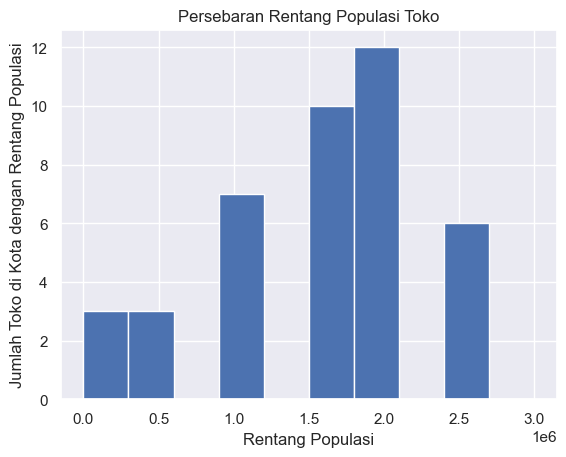

In [21]:
fig, ax = plt.subplots()

ax.set_title("Persebaran Rentang Populasi Toko")
ax.hist(bin[:-1], weights=jumlah_anggota, range=(0, 3000000))
ax.set_ylabel("Jumlah Toko di Kota dengan Rentang Populasi")
ax.set_xlabel("Rentang Populasi")

fig.show()

Pada grafik histogram di atas kita dapat melihat bahwa persebaran data cukup normal dimana sebagian besar toko dibuka di kota dengan populasi `1,000,000 - 1,500,000` (10 Toko) dan `1,500,001 - 2,000,000` (12 Toko) penduduk.

In [22]:
data_rentang_populasi = data_store_code.copy()

def konversi_rentang_populasi(x):
  try:
    match x['Estimasi Populasi']:
      case x if x <= 500000:
        return '0 - 500000'
      case x if x <= 1000000:
        return '500001 - 1000000'
      case x if x <= 1500000:
        return '1000001 - 1500000'
      case x if x <= 2000000:
        return '1500001 - 2000000'
      case x if x <= 2500000:
        return '2000001 - 2500000'
      case _:
        return '> 2500000'
  except:
    return

# data_toko['Rentang Populasi'] = data_toko.apply(lambda x: konversi_rentang_populasi(x), axis=1) # type: ignore
data_rentang_populasi['Rentang Populasi'] = data_rentang_populasi.copy().apply(konversi_rentang_populasi, axis=1) # type: ignore

# Reorder kolom
kolom = ["STORE CODE", "STORE NAME", "SBU", "Tipe Bangunan", "Kelas Bangunan", "Kota Kabupaten 2", "Estimasi Populasi", "Rentang Populasi", "sqm", "Rerata Penjualan Normal", "Rerata Penjualan Pandemi"]
data_rentang_populasi = data_rentang_populasi[kolom]

data_rentang_populasi

,STORE CODE,STORE NAME,SBU,Tipe Bangunan,Kelas Bangunan,Kota Kabupaten 2,Estimasi Populasi,Rentang Populasi,sqm,Rerata Penjualan Normal,Rerata Penjualan Pandemi
0,FF001,FISIK FOOTBALL DAAN MOGOT,Fisik Football,S,S5,Jakarta Barat,2434511,2000001 - 2500000,430.74,"1,238,492,576.00","829,161,004.50"
1,FF002,FISIK FOOTBALL SENAYAN CITY,Fisik Football,M,M1,Jakarta Pusat,1056896,1000001 - 1500000,128.43,"748,960,543.77","457,044,799.61"
2,FF003,FISIK FOOTBALL GANDARIA CITY,Fisik Football,M,M4,Jakarta Selatan,2226812,2000001 - 2500000,42.00,"386,429,562.72","236,821,822.05"
3,FF004,FISIK FOOTBALL TUNJUNGAN PLAZA 3,Fisik Football,M,M2,Surabaya,2874314,> 2500000,64.18,"488,258,455.69","292,491,092.95"
4,FF009,FISIK FOOTBALL GRAND INDONESIA,Fisik Football,M,M1,Jakarta Pusat,1056896,1000001 - 1500000,125.67,"586,264,030.56","352,830,510.21"
5,FF010,FISIK FOOTBALL PONDOK INDAH MALL 3,Fisik Football,M,M2,Jakarta Selatan,2226812,2000001 - 2500000,101.03,"527,975,590.46","286,727,191.71"
6,FF011,FISIK FOOTBALL RESINDA PARK MALL,Fisik Football,M,M5,Karawang,307880,0 - 500000,100.00,"201,918,170.50",NaN
7,FF012,FISIK FOOTBALL - SUMMARECON MALL BEKASI,Fisik Football,M,M3,Bekasi,2564940,> 2500000,62.00,NaN,NaN
8,FO001,FACTORY OUTLET DAAN MOGOT,Fisik Sport,S,S5,Jakarta Barat,2434511,2000001 - 2500000,86.70,NaN,NaN
9,FS001,FISIK SPORT MARGO CITY,Fisik Sport,M,M4,Depok,2056400,2000001 - 2500000,118.00,"571,096,558.54","290,668,937.63"


#### Persebaran Data Categorical

Fisik Sport       17
Our Daily Dose    16
Fisik Football     8
Name: SBU, dtype: int64


<Axes: title={'center': 'Persebaran Data SBU'}>

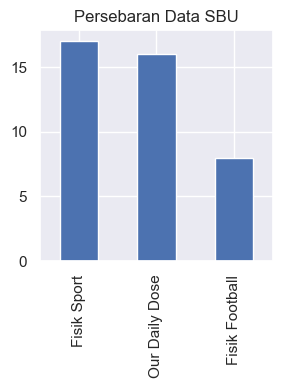

In [23]:
print(data_rentang_populasi["SBU"].value_counts())
data_rentang_populasi["SBU"].value_counts().plot(kind="bar", figsize=(3, 3), title="Persebaran Data SBU")

Persebaran data untuk jenis SBU masih bisa dianggap cukup normal dan tidak memiliki outlier maupun *skewness* yang signigikan.

M4    23
M2     6
M1     4
M3     3
S5     2
R5     2
M5     1
Name: Kelas Bangunan, dtype: int64


<Axes: title={'center': 'Persebaran Data Kelas Bangunan'}>

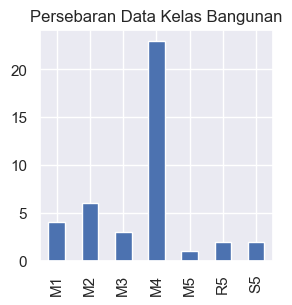

In [24]:
print(data_rentang_populasi["Kelas Bangunan"].value_counts())
data_rentang_populasi["Kelas Bangunan"].value_counts().sort_index().plot(kind="bar", figsize=(3, 3), title="Persebaran Data Kelas Bangunan")

Persebaran data untuk Kelas Bangunan seperti nampak diatas sekilas cukup normal. Namun jika kita hanya memperhitungkan Kelas Bangunan dalam kategori Mall, hanya ada 1 baris data yang masuk ke dalam kategori M5. Hal yang sama juga terjadi pada kategori Kelas Bangunan S5 yang hanya memiliki 1 anggota saja di dalam kategorinya. Untuk itu kita akan melakukan *feature engineering* untuk kolom SBU ini nantinya untuk mencapai distribusi data yang lebih normal dan merata dalam model.

2000001 - 2500000    12
1500001 - 2000000    10
1000001 - 1500000     7
> 2500000             6
0 - 500000            3
500001 - 1000000      3
Name: Rentang Populasi, dtype: int64


<Axes: title={'center': 'Persebaran Data Rentang Populasi'}>

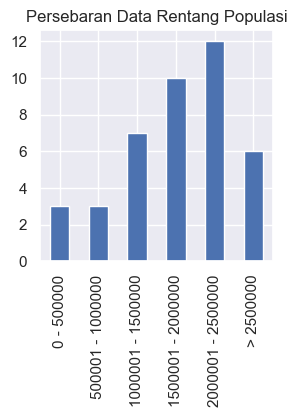

In [25]:
print(data_rentang_populasi["Rentang Populasi"].value_counts())
list_rentang_populasi = [
  "0 - 500000", 
  "500001 - 1000000", 
  "1000001 - 1500000", 
  "1500001 - 2000000", 
  "2000001 - 2500000", 
  "> 2500000"
]
data_rentang_populasi["Rentang Populasi"].value_counts().reindex(list_rentang_populasi).plot(kind="bar", figsize=(3,3), title="Persebaran Data Rentang Populasi")

Persebaran data untuk Rentang Populasi terlihat cukup normal meski memiliki kecenderungan (*skewness*) di sisi kanan.

#### Feature Engineering untuk Kelas Bangunan

Berdasarkan temuan pada bagian sebelumnya, kita akan melakukan *feature engineering* pada fitur Kelas Bangunan untuk mendapatkan distribusi kategori yang lebih normal dan kardinalitas anggota yang lebih baik untuk proses pelatihan nantinya.

Dengan asumsi sebagian besar pembukaan toko baru akan dilakukan di Mall dibandingkan dengan bangunan yang berdiri sendiri dan dengan mereduksi kategori Mall menjadi 3 kelas saja, maka kita akan melakukan mapping sebagai berikut:
- M1 tetap menjadi M1
- M2 dan M3 menjadi M2
- M4 tetap menjadi M3
- M5, R5 dan S5 akan menjadi M4NM (Mall 4/Non-Mall)

In [26]:
data_prep = data_rentang_populasi.copy()

def feature_engineering_kb(x):
  match x["Kelas Bangunan"]:
    case "M1":
      return "M1"
    case "M2" | "M3":
      return "M2"
    case "M4":
      return "M3"
    case _:
      return "M4NM"

data_prep["Kelas Bangunan FE"] = data_prep.apply(lambda x: feature_engineering_kb(x), axis=1)

Persebaran data Kelas Bangunan FE

<Axes: title={'center': 'Persebaran Data Kelas Bangunan FE'}>

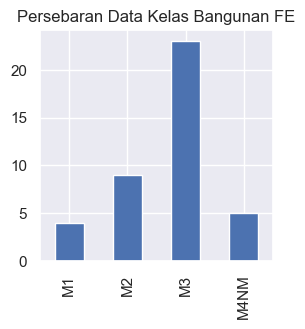

In [27]:
data_prep["Kelas Bangunan FE"].value_counts()
data_prep["Kelas Bangunan FE"].value_counts().sort_index().plot(kind="bar", figsize=(3, 3), title="Persebaran Data Kelas Bangunan FE")

## Konversi Data Categorical ke dalam Label Encoder
---
Dengan perubahan-perubahan pada sub-bagian sebelumnya maka fungsi regresi linear dapat digambarkan ulang sebagai berikut:  
  
$
{Rerata Penjualan Normal} = a \cdot {SBU} + b \cdot {Kelas Bangunan FE} + c \cdot {Luas Area} + d \cdot {Rentang Populasi} + e
$ 
   
Dikarenakan `SBU`, `Kelas Bangunan FE` dan `Rentang Populasi` merupakan tipe data *categorical*, sedangkan pelatihan jaringan saraf tiruan untuk sebuah model memerlukan semua input dalam bentuk numerik, maka kita akan melakukan konversi pada ketiga data tersebut menjadi numerik.  
Dilihat dari jenis datanya, `SBU` dapat kita kategorikan sebagai *categorical nominal*, sedangkan `Rentang Populasi` dan `Kelas Kategori FE` merupakan *categorical ordinal*.  
Untuk data *categorical nominal* kita akan menerapkan proses *One Hot Encoding* untuk menerapakan pelabelan numerik tanpa susunan maupun bobot dan untuk data *categorical ordinal* kita akan menggunakan *Ordinal Encoding*.

In [28]:
# One Hot Encoding SBU
ohe = OneHotEncoder(sparse_output=False)
sbu_encoded = ohe.fit_transform(data_prep["SBU"].values.reshape(-1, 1)) # type: ignore
data_sbu_encoded = pd.DataFrame(sbu_encoded, columns=ohe.get_feature_names_out(["SBU"]))
print(f"Data SBU setelah proses One Hot Encoding: \n{data_sbu_encoded}")

# Ordinal Encoding Kelas Bangunan dan Rentang Populasi
oe = OrdinalEncoder()
kelas_bangunan_fe_encoded = oe.fit_transform(data_prep["Kelas Bangunan FE"].values.reshape(-1, 1)) # type: ignore
data_kelas_bangunan_fe_encoded = pd.DataFrame(kelas_bangunan_fe_encoded, columns=["Kelas Bangunan FE Encoded"])
print(f"Data Kelas Bangunan FE setelah proses Ordinal Encoding: \n{data_kelas_bangunan_fe_encoded}")
oe = OrdinalEncoder(categories=[list_rentang_populasi])
rentang_populasi_encoded = oe.fit_transform(data_prep["Rentang Populasi"].values.reshape(-1, 1)) # type: ignore
data_rentang_populasi_encoded = pd.DataFrame(rentang_populasi_encoded, columns=["Rentang Populasi Encoded"])
print(f"Data Rentang Populasi setelah proses Ordinal Encoding: \n{data_rentang_populasi_encoded}")

Data SBU setelah proses One Hot Encoding: 
    SBU_Fisik Football  SBU_Fisik Sport  SBU_Our Daily Dose
0                 1.00             0.00                0.00
1                 1.00             0.00                0.00
2                 1.00             0.00                0.00
3                 1.00             0.00                0.00
4                 1.00             0.00                0.00
5                 1.00             0.00                0.00
6                 1.00             0.00                0.00
7                 1.00             0.00                0.00
8                 0.00             1.00                0.00
9                 0.00             1.00                0.00
10                0.00             1.00                0.00
11                0.00             1.00                0.00
12                0.00             1.00                0.00
13                0.00             1.00                0.00
14                0.00             1.00                0.

Pemilihan fitur dan label untuk bahan pelatihan.

In [29]:
data_model_full = pd.concat([data_prep, data_sbu_encoded, data_kelas_bangunan_fe_encoded, data_rentang_populasi_encoded], axis=1)
data_model_full

,STORE CODE,STORE NAME,SBU,Tipe Bangunan,Kelas Bangunan,Kota Kabupaten 2,Estimasi Populasi,Rentang Populasi,sqm,Rerata Penjualan Normal,Rerata Penjualan Pandemi,Kelas Bangunan FE,SBU_Fisik Football,SBU_Fisik Sport,SBU_Our Daily Dose,Kelas Bangunan FE Encoded,Rentang Populasi Encoded
0,FF001,FISIK FOOTBALL DAAN MOGOT,Fisik Football,S,S5,Jakarta Barat,2434511,2000001 - 2500000,430.74,"1,238,492,576.00","829,161,004.50",M4NM,1.00,0.00,0.00,3.00,4.00
1,FF002,FISIK FOOTBALL SENAYAN CITY,Fisik Football,M,M1,Jakarta Pusat,1056896,1000001 - 1500000,128.43,"748,960,543.77","457,044,799.61",M1,1.00,0.00,0.00,0.00,2.00
2,FF003,FISIK FOOTBALL GANDARIA CITY,Fisik Football,M,M4,Jakarta Selatan,2226812,2000001 - 2500000,42.00,"386,429,562.72","236,821,822.05",M3,1.00,0.00,0.00,2.00,4.00
3,FF004,FISIK FOOTBALL TUNJUNGAN PLAZA 3,Fisik Football,M,M2,Surabaya,2874314,> 2500000,64.18,"488,258,455.69","292,491,092.95",M2,1.00,0.00,0.00,1.00,5.00
4,FF009,FISIK FOOTBALL GRAND INDONESIA,Fisik Football,M,M1,Jakarta Pusat,1056896,1000001 - 1500000,125.67,"586,264,030.56","352,830,510.21",M1,1.00,0.00,0.00,0.00,2.00
5,FF010,FISIK FOOTBALL PONDOK INDAH MALL 3,Fisik Football,M,M2,Jakarta Selatan,2226812,2000001 - 2500000,101.03,"527,975,590.46","286,727,191.71",M2,1.00,0.00,0.00,1.00,4.00
6,FF011,FISIK FOOTBALL RESINDA PARK MALL,Fisik Football,M,M5,Karawang,307880,0 - 500000,100.00,"201,918,170.50",NaN,M4NM,1.00,0.00,0.00,3.00,0.00
7,FF012,FISIK FOOTBALL - SUMMARECON MALL BEKASI,Fisik Football,M,M3,Bekasi,2564940,> 2500000,62.00,NaN,NaN,M2,1.00,0.00,0.00,1.00,5.00
8,FO001,FACTORY OUTLET DAAN MOGOT,Fisik Sport,S,S5,Jakarta Barat,2434511,2000001 - 2500000,86.70,NaN,NaN,M4NM,0.00,1.00,0.00,3.00,4.00
9,FS001,FISIK SPORT MARGO CITY,Fisik Sport,M,M4,Depok,2056400,2000001 - 2500000,118.00,"571,096,558.54","290,668,937.63",M3,0.00,1.00,0.00,2.00,4.00


In [30]:
data_final = data_model_full.copy()
data_final = data_final.drop(columns=["STORE CODE", "STORE NAME", "SBU", "Tipe Bangunan", "Kelas Bangunan", "Kelas Bangunan FE", "Kota Kabupaten 2", "Estimasi Populasi", "Rentang Populasi", "Rerata Penjualan Pandemi"], axis=1)
data_final = data_final[["sqm", "SBU_Fisik Football", "SBU_Fisik Sport", "SBU_Our Daily Dose", "Kelas Bangunan FE Encoded", "Rentang Populasi Encoded", "Rerata Penjualan Normal"]]
data_final.dropna(subset=["Rerata Penjualan Normal"], inplace=True)
data_final

,sqm,SBU_Fisik Football,SBU_Fisik Sport,SBU_Our Daily Dose,Kelas Bangunan FE Encoded,Rentang Populasi Encoded,Rerata Penjualan Normal
0,430.74,1.00,0.00,0.00,3.00,4.00,"1,238,492,576.00"
1,128.43,1.00,0.00,0.00,0.00,2.00,"748,960,543.77"
2,42.00,1.00,0.00,0.00,2.00,4.00,"386,429,562.72"
3,64.18,1.00,0.00,0.00,1.00,5.00,"488,258,455.69"
4,125.67,1.00,0.00,0.00,0.00,2.00,"586,264,030.56"
5,101.03,1.00,0.00,0.00,1.00,4.00,"527,975,590.46"
6,100.00,1.00,0.00,0.00,3.00,0.00,"201,918,170.50"
9,118.00,0.00,1.00,0.00,2.00,4.00,"571,096,558.54"
10,104.45,0.00,1.00,0.00,2.00,5.00,"483,868,280.67"
11,98.80,0.00,1.00,0.00,2.00,3.00,"617,426,025.23"


#### Eksplorasi Data Final

In [31]:
data_final.describe()

,sqm,SBU_Fisik Football,SBU_Fisik Sport,SBU_Our Daily Dose,Kelas Bangunan FE Encoded,Rentang Populasi Encoded,Rerata Penjualan Normal
count,37.00,37.00,37.00,37.00,37.00,37.00,37.00
mean,113.99,0.19,0.41,0.41,1.68,3.03,"616,945,526.90"
std,61.41,0.40,0.50,0.50,0.82,1.42,"356,224,230.03"
min,42.00,0.00,0.00,0.00,0.00,0.00,"201,918,170.50"
25%,86.21,0.00,0.00,0.00,1.00,2.00,"423,175,982.21"
50%,101.03,0.00,0.00,0.00,2.00,3.00,"519,724,681.38"
75%,128.43,0.00,1.00,1.00,2.00,4.00,"748,960,543.77"
max,430.74,1.00,1.00,1.00,3.00,5.00,"1,688,749,394.53"


In [32]:
koefisien_korelasi = data_final.corr()
koefisien_korelasi

,sqm,SBU_Fisik Football,SBU_Fisik Sport,SBU_Our Daily Dose,Kelas Bangunan FE Encoded,Rentang Populasi Encoded,Rerata Penjualan Normal
sqm,1.00,0.22,-0.15,-0.03,0.09,0.07,0.46
SBU_Fisik Football,0.22,1.00,-0.40,-0.40,-0.15,-0.01,-0.03
SBU_Fisik Sport,-0.15,-0.40,1.00,-0.68,0.40,-0.21,-0.50
SBU_Our Daily Dose,-0.03,-0.40,-0.68,1.00,-0.28,0.22,0.52
Kelas Bangunan FE Encoded,0.09,-0.15,0.40,-0.28,1.00,-0.04,-0.54
Rentang Populasi Encoded,0.07,-0.01,-0.21,0.22,-0.04,1.00,0.07
Rerata Penjualan Normal,0.46,-0.03,-0.50,0.52,-0.54,0.07,1.00


Text(0.5, 1.0, 'Heatmap Pearson Correlation Data Final')

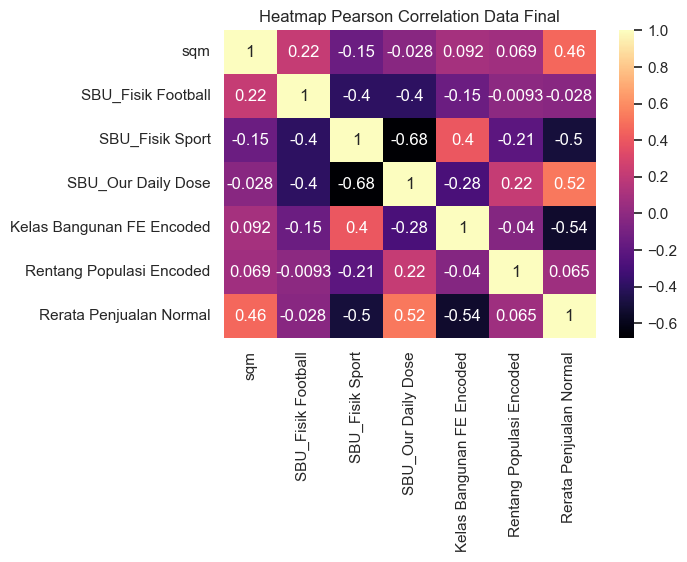

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(koefisien_korelasi, annot=True, cmap='magma')
plt.title("Heatmap Pearson Correlation Data Final")

Dan berikut adalah distribusi variabel independen terkait dengan variable independen lainnya.

Text(0.5, 1.02, 'Distribusi antara Variabel Independen')

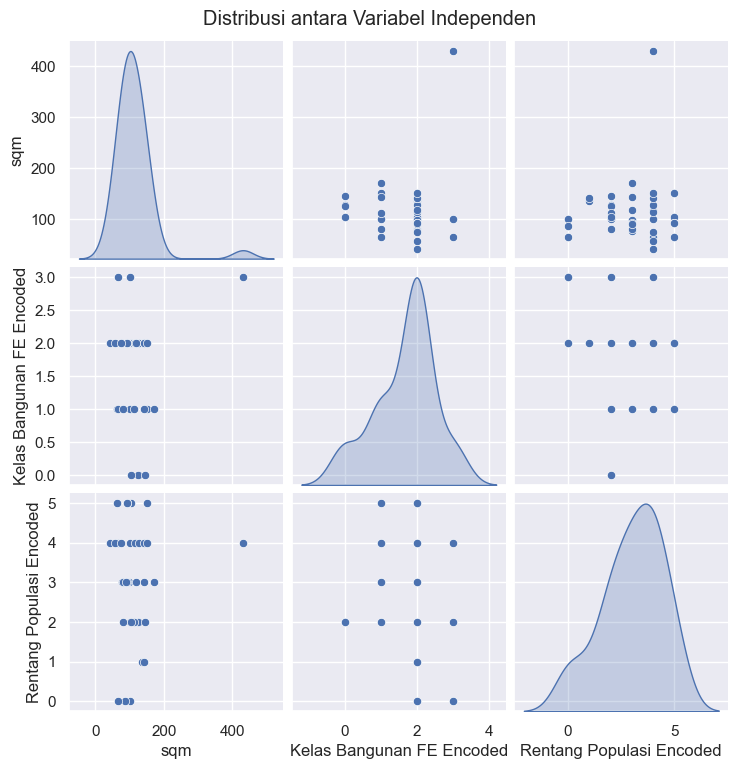

In [34]:
plot = sns.pairplot(data=data_final[["sqm", "Kelas Bangunan FE Encoded", "Rentang Populasi Encoded"]], diag_kind='kde')
plot.fig.suptitle("Distribusi antara Variabel Independen", y=1.02)

## Scaling dan Pembentukan Data Train Test
---

### Scaling
Merujuk kepada nilai dalam data yang dimiliki, kita sebenarnya hanya memiliki 1 fitur (kolom) dengan nilai numerik, yaitu kolom `sqm` sedangkan sisanya merupakan kategori yang di-encode baik secara One Hot Encoding maupun Label Encoding. Hal ini menyebabkan *mean* dari `sqm` memiliki nilai yang jauh berbeda dengan *mean* fitur - fitur lainnya, dan untuk mencegah proses update bobot dalam layer dari jaringan saraf tiruan dalam proses pelatihan memberikan bobot yang terlalu besar kepada `sqm` dibandingkan dengan fitur-fitur lainnya, kita akan menambahkan lapisan normalisasi untuk fitur `sqm`.

### Pembentukan Data Train Test

#### Data X y
Data X yang akan dipergunakan sebagai fitur adalah semua kolom pada `data_model` terkecuali kolom `Rerata Penjualan Normal` yang akan menjadi Data y.

In [35]:
data_pelatihan = data_final.copy()

y = data_pelatihan["Rerata Penjualan Normal"]
X = data_pelatihan.drop("Rerata Penjualan Normal", axis=1)

print("Data X:")
print(X.to_string())
print("\nData y:")
print(y.to_string())

Data X:
      sqm  SBU_Fisik Football  SBU_Fisik Sport  SBU_Our Daily Dose  Kelas Bangunan FE Encoded  Rentang Populasi Encoded
0  430.74                1.00             0.00                0.00                       3.00                      4.00
1  128.43                1.00             0.00                0.00                       0.00                      2.00
2   42.00                1.00             0.00                0.00                       2.00                      4.00
3   64.18                1.00             0.00                0.00                       1.00                      5.00
4  125.67                1.00             0.00                0.00                       0.00                      2.00
5  101.03                1.00             0.00                0.00                       1.00                      4.00
6  100.00                1.00             0.00                0.00                       3.00                      0.00
9  118.00                0.00   

#### Data Train Test
Pembagian data train dan test adalah dengan rasio data test sebesar 0.3 dari total data, menggunakan random_state yang di-set pada 13

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, shuffle=True)
print(f"X_train:\n{X_train.to_string()}\n") # type: ignore
print(f"y_train:\n{y_train.to_string()}\n") # type: ignore
print(f"X_test:\n{X_test.to_string()}\n") # type: ignore
print(f"y_test:\n{y_test.to_string()}") # type: ignore

X_train:
      sqm  SBU_Fisik Football  SBU_Fisik Sport  SBU_Our Daily Dose  Kelas Bangunan FE Encoded  Rentang Populasi Encoded
19 112.50                0.00             1.00                0.00                       1.00                      2.00
14  65.00                0.00             1.00                0.00                       3.00                      0.00
10 104.45                0.00             1.00                0.00                       2.00                      5.00
23 142.00                0.00             1.00                0.00                       2.00                      4.00
1  128.43                1.00             0.00                0.00                       0.00                      2.00
39 171.00                0.00             0.00                1.00                       1.00                      3.00
30 151.76                0.00             0.00                1.00                       1.00                      4.00
0  430.74                1.00  

### Normalisasi dan Transformasi pada X_train dan X_test
Mengingat bahwa pada data `X_train` dan `X_test` kita hanya memiliki 1 fitur numerik (`sqm`) dan sisanya adalah *categorical encoding* maka skala antar fitur bisa terlihat sangat jomplang dan dapat menyebabkan model untuk membutuhkan waktu dalam dalam melakukan pemutakhiran bobot dalam proses *backpropagation* setiap epoch menggunakan optimizer-nya, maka dirasa perlu untuk melakukan normalisasi pada data `X_train` dan `X_test` untuk fitur `sqm`.
Serta dikarenakan jumlah sample yang sangat terbatas serta beberapa fitur *categorical encoded* yang memiliki kecondongan (*skewedness*) terhadap beberapa kategori saja, maka juga dirasa perlu untuk melakukan transformasi kuantil (menggunakan *quantile transformer*) pada data `X_train` dan `X_test`.

In [37]:
# Normalisasi sqm pada Data X_train dan X_test
kolom_target_normalisasi = ["sqm"]
sc = StandardScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
sc.fit(X[kolom_target_normalisasi]) # type: ignore
X_train_norm[kolom_target_normalisasi] = sc.transform(X_train_norm[kolom_target_normalisasi]) # type: ignore
X_test_norm[kolom_target_normalisasi] = sc.transform(X_test_norm[kolom_target_normalisasi]) # type: ignore

print ("Data X_train sqm setelah normalisasi:")
print(X_train_norm["sqm"]) # type: ignore
print("")
print ("Data X_test sqm setelah normalisasi:")
print(X_test_norm["sqm"]) # type: ignore

# Menyimpan normalisasi yang sudah di fit dengan X_train
dump(sc, 'normalizer/sqm_normalizer.bin', compress=True)

Data X_train sqm setelah normalisasi:
19   -0.02
14   -0.81
10   -0.16
23    0.46
1     0.24
39    0.94
30    0.62
0     5.23
32   -0.35
34    0.53
13   -0.46
11   -0.25
38   -0.66
15   -0.23
5    -0.21
25   -0.17
16   -0.55
2    -1.19
33    0.45
22   -0.61
29   -0.93
28   -0.36
18    0.02
12    0.35
20    0.23
Name: sqm, dtype: float64

Data X_test sqm setelah normalisasi:
37    0.61
9     0.07
36    0.06
26   -0.81
21   -0.35
3    -0.82
35    0.47
4     0.19
17   -0.39
6    -0.23
27   -0.54
31   -0.39
Name: sqm, dtype: float64


['normalizer/sqm_normalizer.bin']

## Model
---

### Pembentukan Model
Pada bagian ini kita akan coba untuk membuat beberapa model yang akan dipergunakan dalam pelatihan nantinya. Pelatihan model akan dilakukan menggunakan modul regressor pada TensorFlow, Scikit, LGBM dan XGBoost.

#### TensorFlow
Beberapa model pelatihan jaringan saraf tiruan akan dilakukan menggunakan TensorFlow. Parameter dasar TensorFlow yang digunakan dalam kasus ini diantaranya:
- `loss` yang akan dimonitor adalah *mean absolute error* (terutama `val_mean_absolute_error` pada *callbacks*) pada model yang merupakan formula $\frac{\sum^n_{i=1}|\hat{y}-y_i|}{n}$ dimana $\hat{y}$ adalah nilai prediksi, $y_i$ adalah nilai sebenarnya dan $n$ adalah jumlah sampel dalam dataset validasi.
- `optimizer` yang digunakan dalam melakukan update bobot dan bias pada *neuron* dalam masing-masing *layer* dalam proses *backpropagation* di setiap *epoch* (atau dalam kasus ini pada setiap *batch*) adalah `Adam()` ([*Adaptive Moment Estimation*](https://arxiv.org/abs/1412.6980)) dengan *learning rate* 0.1.
- `metric` yang digunakan sama dengan `loss` yaitu `["mean_absolute_error"]`.
- Jumlah `epoch` untuk setiap model adalah 1000.
- Jumlah `batch_size` yang dipergunakan dalam proses `fit()` untuk mengupdate bobot dan bias pada *neuron* dalam masing-masing layer adalah 4.
- `callbacks` yang digunakan adalah:
  - `EarlyStopping()` dengan *patience* default 10, namun dalam studi kasus akan menggunakan *patience* 20 dan `monitor` yang diset untuk `val_mean_absolute_error`.
  - `ModelCheckpoint()` yang akan memonitor `val_mean_absolute_error` pada setiap *epoch* dan menyimpannya di folder `model/model.name`
- Terdapat setidaknya 2 model dasar, yaitu `model_dense_1_layer` dan `model_dnn_3_layer`. `model_dense_1_layer` hanya menggunakan 1 *dense layer* dengan fungsi aktivasi default `Linear`, sedangkan `model_dnn_3_layer` merupakan model dengan 3 *dense layer* yang terdiri dari 2 *dense layer* dengan fungsi aktivasi `ReLU` ([*Rectified Linear Unit*](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)) dan jumlah *neuron* default 64 (dapat disetting berbeda) serta 1 *dense layer* (output) dengan fungsi aktivasi `Linear`.

In [38]:


## TENSORFLOW MODEL
class TensorFlow:
  # Inisiasi kelas dan parameter model
  def __init__(self, 
               fitur_train: pd.DataFrame, 
               target_train: pd.DataFrame,
               fitur_test: pd.DataFrame,
               target_test: pd.DataFrame,
               es_patience: int = 0,
               callbacks: list = [],
               loss: Literal["mae", "mse"] = "mae",
               optimizer: Literal["adam", "sgd", "adadelta"] = "adam",
               optimizer_lr: float = 0.1,
               metric: list = ['mean_absolute_error'],
               epoch: int = 100,
               verbose_mode: int = 0):
    self.fitur_train = fitur_train
    self.target_train = target_train
    self.fitur_test = fitur_test
    self.target_test = target_test
    self.es_patience = es_patience
    self.callbacks = callbacks
    self.optimizer_lr = optimizer_lr
    self.metric = metric
    self.epoch = epoch
    match loss:
      case "mse":
        self.loss = tf.keras.losses.mse
      case _:
        self.loss = tf.keras.losses.mae
    match optimizer:
      case "sgd":
        self.optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=self.optimizer_lr)
      case "adadelta":
        self.optimizer = tf.keras.optimizers.legacy.Adadelta(learning_rate=self.optimizer_lr)
      case _:
        self.optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=self.optimizer_lr)
    self.verbose_mode = verbose_mode
    
  # Setting callbacks
  def callbacks_model(self, model_compiled):
    if len(self.callbacks) == 0:
      return [tf.keras.callbacks.EarlyStopping(monitor="val_mean_absolute_error", 
                                              patience=10 if self.es_patience <= 0 else self.es_patience,
                                              restore_best_weights=True,
                                              verbose=0),
              tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(os.getcwd(), f"model/{model_compiled.name}"),
                                                monitor="val_mean_absolute_error",
                                                save_best_only=True,
                                                verbose=0)]
    else:
      return self.callbacks
          
  # Compile model
  def compile_model(self, model):
    model.compile(loss=self.loss,
                  optimizer=self.optimizer,
                  metrics=self.metric)
    
  # Fit model
  def fit_model(self, model):
    return model.fit(self.fitur_train, 
                     self.target_train, 
                     epochs=self.epoch, 
                     validation_data=(self.fitur_test, self.target_test), 
                     callbacks=self.callbacks_model(model), 
                     verbose=self.verbose_mode,
                     batch_size=4)
  
  # Model_Regresi_linear_1_Layer
  def model_dense_1_layer(self,
                          nama_model: str = ""):
    # Model Def
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(1, input_dim=X_train.shape[1]) # type: ignore
    ], name=nama_model)
    self.compile_model(model)
    return model
  
  # Model_Regresi_Linear_3_Layer_2_RELU
  def model_dnn_3_layer(self, 
                        unit_1: int = 64, 
                        unit_2: int = 64,
                        nama_model: str = ""):
    # Model Def
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(unit_1, activation="relu", name=f"dense_layer_1_{unit_1}_nodes_relu_activation"),
      tf.keras.layers.Dense(unit_2, activation="relu", name=f"dense_layer_2_{unit_2}_nodes_relu_activation"),
      tf.keras.layers.Dense(1, name="dense_layer_output_1_node_linear_activation")
    ], name=nama_model)
    self.compile_model(model)
    return model

#### Scikit
Fungsi regresi linear yang akan dipergunakan dari modul Scikit adalah `LinearRegression()` dan `DecisionTreeRegressor()`. Tidak banyak kustomisasi yang dapat dilakukan pada modul ini karena sifat *built-in* dari fungsi-fungsi tersebut secara default dinilai sudah cukup baik.

In [39]:
## SCIKIT MODEL
class SK:
  # Inisiasi kelas dan parameter model
  def __init__(self, 
               fitur_train: pd.DataFrame, 
               target_train: pd.DataFrame,
               fitur_test: pd.DataFrame,
               target_test: pd.DataFrame):
    self.fitur_train = fitur_train
    self.target_train = target_train
    self.fitur_test = fitur_test
    self.target_test = target_test
    
  # Fit model
  def fit_model(self, model):
    return model.fit(self.fitur_train, self.target_train)
  
  # Plotting nilai sebenarnya dan prediksi
  def plot_hasil(self):
    return
  
  # Model_SK_Linear_Regresi
  def regresi_linear(self):
    return LinearRegression()
  
  # Model_SK_Decision_Tree
  def decision_tree(self):
    return DecisionTreeRegressor()
  
  # Model_SK_Random_Forest
  def random_forest(self):
    return RandomForestRegressor()
  
  # Model_SK_Gradient_Boosting
  def gradient_boosting(self):
    return GradientBoostingRegressor()

#### LightGBM dan XGBoost

Dua pustaka pembelajaran mesin lainnya yang akan digunakan diantaranya *light gradient-boosting machine* ([LightGBM](https://lightgbm.readthedocs.io))dan *extreme gradient boosting* ([XGBoost](https://xgboost.readthedocs.io)). Sama dengan Scikit, tidak banyak kustomisasi yang dilakukan untuk parameter di dalam dua pustaka ini.

In [40]:
# LIGHTGBM DAN XGBOOST MODEL (ENSEMBLE REGRESSOR)
class EnsembleModel:
  def __init__(self,
               fitur_train: pd.DataFrame,
               target_train: pd.DataFrame,
               fitur_test: pd.DataFrame,
               target_test: pd.DataFrame):
    self.fitur_train = fitur_train
    self.target_train = target_train
    self.fitur_test = fitur_test
    self.target_test = target_test
  
  def fit_model(self, model):
    return model.fit(self.fitur_train, self.target_train)
  
  def lgbm(self):
    return lightgbm.LGBMRegressor()
  
  def xgb(self):
    return xgboost.XGBRFRegressor()

In [41]:
# Plotting nilai sebenarnya dan prediksi
def plot_hasil(ax,
               prediksi,
               y_test,
               label_prediksi,
               label_y_test):
  ax.scatter(prediksi, y_test, c='crimson')
  ax.set_title("Mean Absolute Error")
  ax.set_yscale('log')
  ax.set_xscale('log')
  titik_awal = max(max(prediksi), max(y_test))
  titik_akhir = min(min(prediksi), min(y_test))
  ax.plot([titik_awal, titik_akhir], [titik_awal, titik_akhir], 'b-')
  ax.set_xlabel(label_prediksi)
  ax.set_ylabel(label_y_test)
  return ax

### Pelatihan Model

#### TensorFlow
Kita akan melakukan pelatihan jaringan saraf tiruan menggunakan TensorFlow untuk setidaknya 7 model, yaitu:
- Model DNN 3 Layer ReLU 16 16 (`Model_DNN_3_Layer_RELU_16_16`) dengan jumlah *neuron* pada *dense layer* pertama dan kedua masing-masing 16 *neuron*.
- Model DNN 3 Layer ReLU 32 16 (`Model_DNN_3_Layer_RELU_32_16`) dengan jumlah *neuron* pada *dense layer* pertama dan kedua masing-masing 32 dan 16 *neuron* secara berturut-turut.
- Model DNN 3 Layer ReLU 32 32 (`Model_DNN_3_Layer_RELU_32_32`) dengan jumlah *neuron* pada *dense layer* pertama dan kedua masing-masing 32 *neuron*.
- Model DNN 3 Layer ReLU 64 32 (`Model_DNN_3_Layer_RELU_64_32`) dengan jumlah *neuron* pada *dense layer* pertama dan kedua masing-masing 64 dan 32 *neuron* secara berturut-turut.
- Model DNN 3 Layer ReLU 64 64 (`Model_DNN_3_Layer_RELU_64_64`) dengan jumlah *neuron* pada *dense layer* pertama dan kedua masing-masing 64 *neuron* atau nilai default `unit_size` pada `model_dnn_3_layer`.
- Model DNN 3 Layer ReLU 128 64 (`Model_DNN_3_Layer_RELU_128_64`) dengan jumlah *neuron* pada *dense layer* pertama dan kedua masing-masing 128 dan 64 *neuron* secara berturut-turut.
- Model DNN 3 Layer ReLU 128 128 (`Model_DNN_3_Layer_RELU_128_128`) dengan jumlah *neuron* pada *dense layer* pertama dan kedua masing-masing 128 *neuron*.  
  
Parameter `patience` dari `tf.keras.callbacks.EarlyStopping()` di-set menjadi 20 *epoch* dan jumlah `epoch` yang digunakan dalam setiap pelatihan adalah 1000.

INFO:tensorflow:Assets written to: d:\ProjectInGit\store_average_sales_model\model\Model_DNN_3_Layer_RELU_16_16\assets
INFO:tensorflow:Assets written to: d:\ProjectInGit\store_average_sales_model\model\Model_DNN_3_Layer_RELU_16_16\assets
INFO:tensorflow:Assets written to: d:\ProjectInGit\store_average_sales_model\model\Model_DNN_3_Layer_RELU_16_16\assets
INFO:tensorflow:Assets written to: d:\ProjectInGit\store_average_sales_model\model\Model_DNN_3_Layer_RELU_16_16\assets
INFO:tensorflow:Assets written to: d:\ProjectInGit\store_average_sales_model\model\Model_DNN_3_Layer_RELU_16_16\assets
INFO:tensorflow:Assets written to: d:\ProjectInGit\store_average_sales_model\model\Model_DNN_3_Layer_RELU_16_16\assets
INFO:tensorflow:Assets written to: d:\ProjectInGit\store_average_sales_model\model\Model_DNN_3_Layer_RELU_16_16\assets
INFO:tensorflow:Assets written to: d:\ProjectInGit\store_average_sales_model\model\Model_DNN_3_Layer_RELU_16_16\assets
INFO:tensorflow:Assets written to: d:\ProjectInG

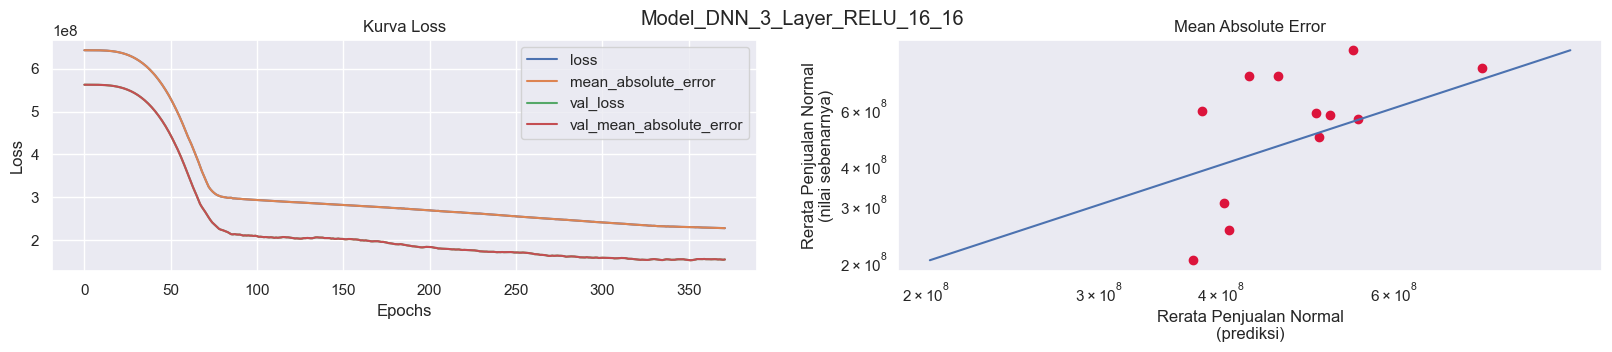

Model: "Model_DNN_3_Layer_RELU_16_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1_16_nodes_relu  (None, 16)               112       
 _activation (Dense)                                             
                                                                 
 dense_layer_2_16_nodes_relu  (None, 16)               272       
 _activation (Dense)                                             
                                                                 
 dense_layer_output_1_node_l  (None, 1)                17        
 inear_activation (Dense)                                        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Skor R2: 18.76%
Mean Absolute Error: 152,920,048
Mean Squared Error: 37,206,360,732,798,984




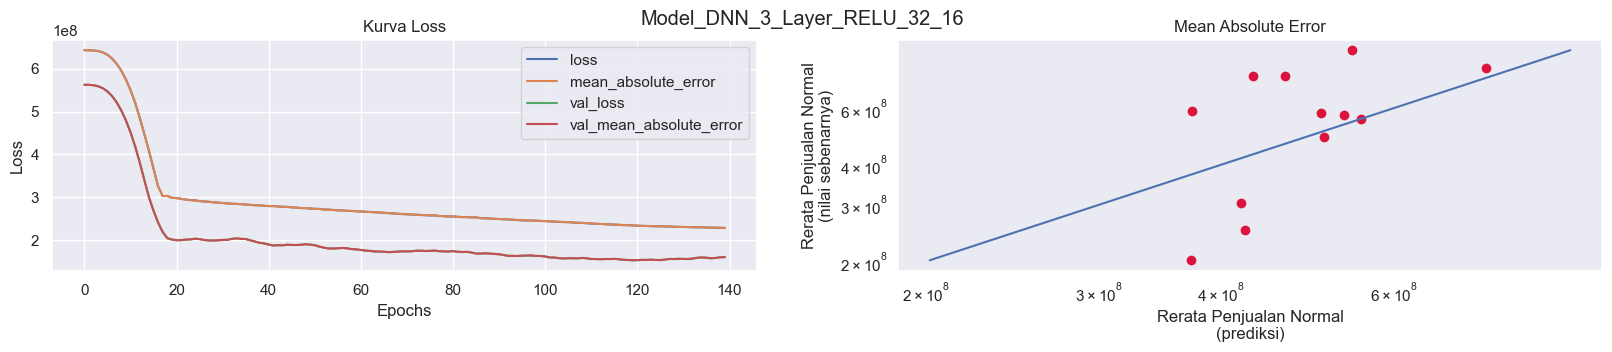

Model: "Model_DNN_3_Layer_RELU_32_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1_32_nodes_relu  (None, 32)               224       
 _activation (Dense)                                             
                                                                 
 dense_layer_2_16_nodes_relu  (None, 16)               528       
 _activation (Dense)                                             
                                                                 
 dense_layer_output_1_node_l  (None, 1)                17        
 inear_activation (Dense)                                        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Skor R2: 18.33%
Mean Absolute Error: 153,157,360
Mean Squared Error: 37,402,867,703,144,856




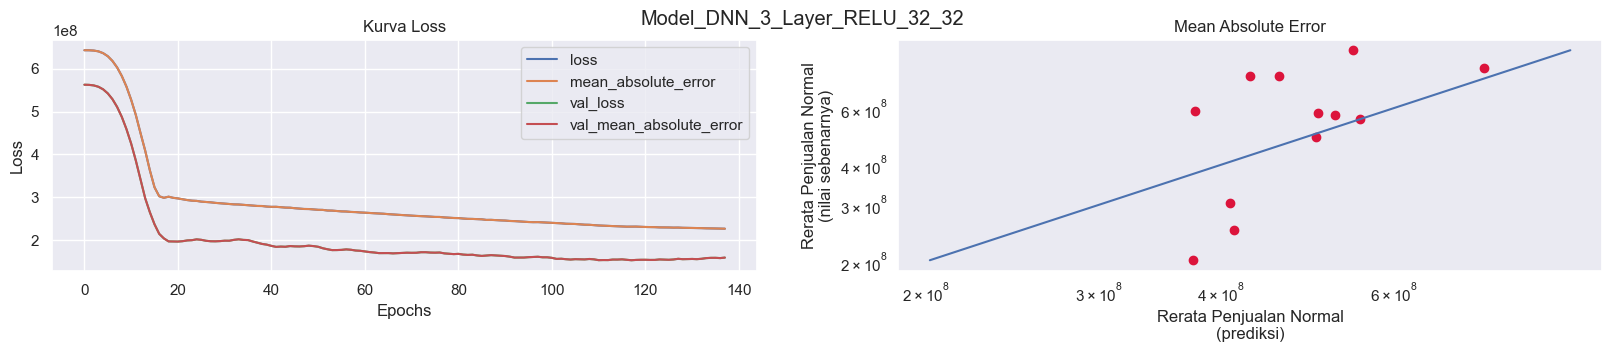

Model: "Model_DNN_3_Layer_RELU_32_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1_32_nodes_relu  (None, 32)               224       
 _activation (Dense)                                             
                                                                 
 dense_layer_2_32_nodes_relu  (None, 32)               1056      
 _activation (Dense)                                             
                                                                 
 dense_layer_output_1_node_l  (None, 1)                33        
 inear_activation (Dense)                                        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________
Skor R2: 18.19%
Mean Absolute Error: 152,819,664
Mean Squared Error: 37,466,575,157,128,992




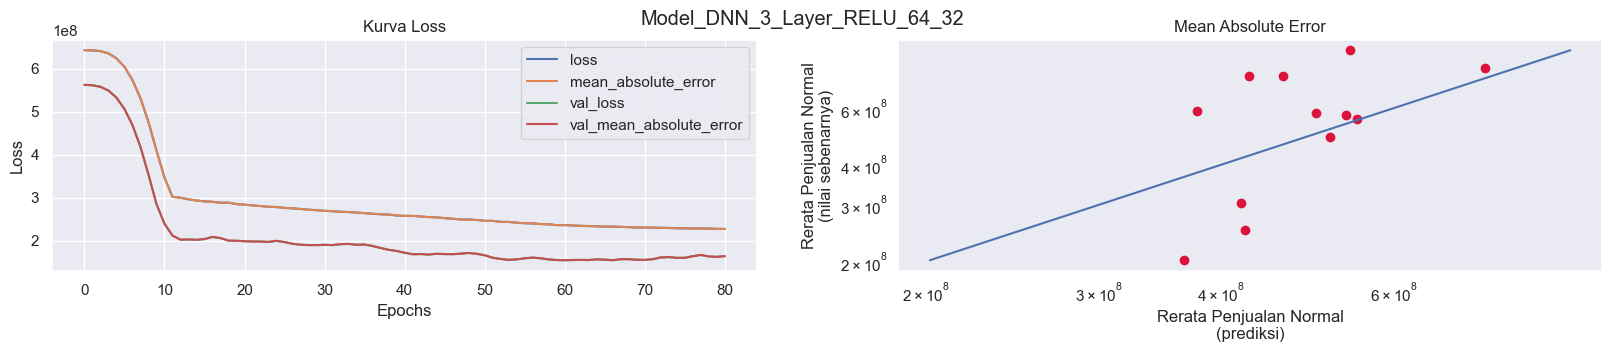

Model: "Model_DNN_3_Layer_RELU_64_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1_64_nodes_relu  (None, 64)               448       
 _activation (Dense)                                             
                                                                 
 dense_layer_2_32_nodes_relu  (None, 32)               2080      
 _activation (Dense)                                             
                                                                 
 dense_layer_output_1_node_l  (None, 1)                33        
 inear_activation (Dense)                                        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________
Skor R2: 17.60%
Mean Absolute Error: 154,426,992
Mean Squared Error: 37,735,468,492,580,784




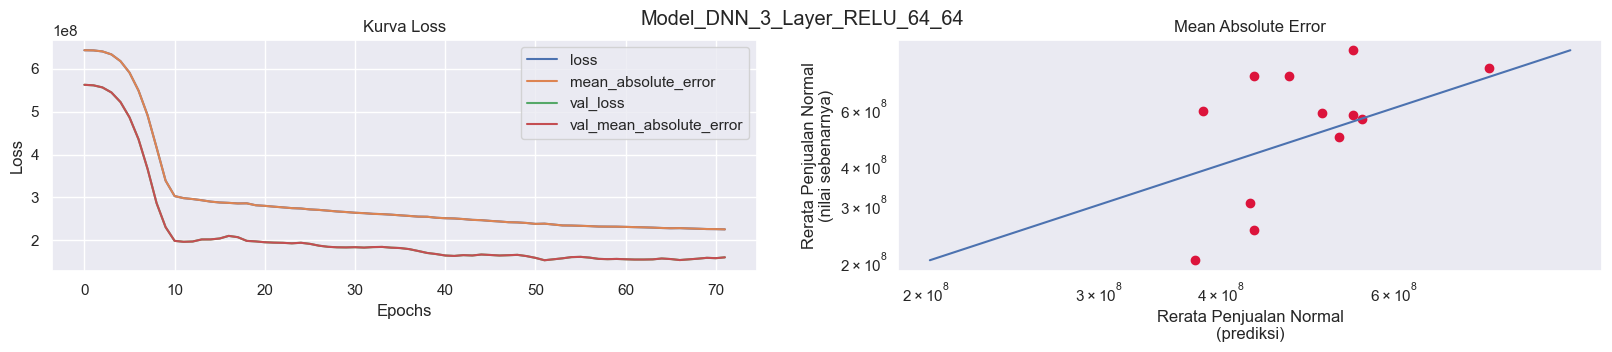

Model: "Model_DNN_3_Layer_RELU_64_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1_64_nodes_relu  (None, 64)               448       
 _activation (Dense)                                             
                                                                 
 dense_layer_2_64_nodes_relu  (None, 64)               4160      
 _activation (Dense)                                             
                                                                 
 dense_layer_output_1_node_l  (None, 1)                65        
 inear_activation (Dense)                                        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________
Skor R2: 18.73%
Mean Absolute Error: 153,648,688
Mean Squared Error: 37,217,951,766,727,792




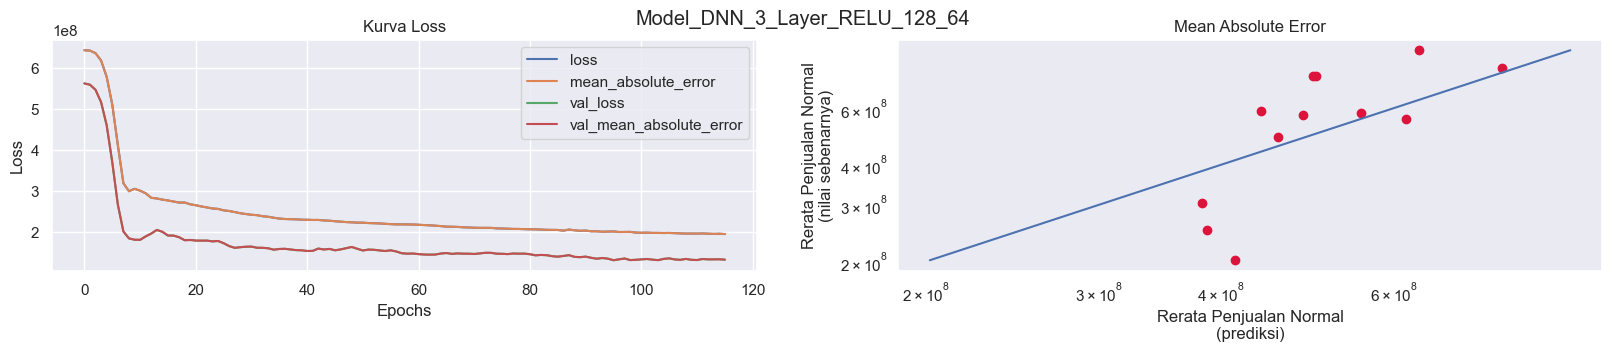

Model: "Model_DNN_3_Layer_RELU_128_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1_128_nodes_rel  (None, 128)              896       
 u_activation (Dense)                                            
                                                                 
 dense_layer_2_64_nodes_relu  (None, 64)               8256      
 _activation (Dense)                                             
                                                                 
 dense_layer_output_1_node_l  (None, 1)                65        
 inear_activation (Dense)                                        
                                                                 
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________
Skor R2: 43.61%
Mean Absolute Error: 132,501,824
Mean Squared Error: 25,824,907,242,788,144




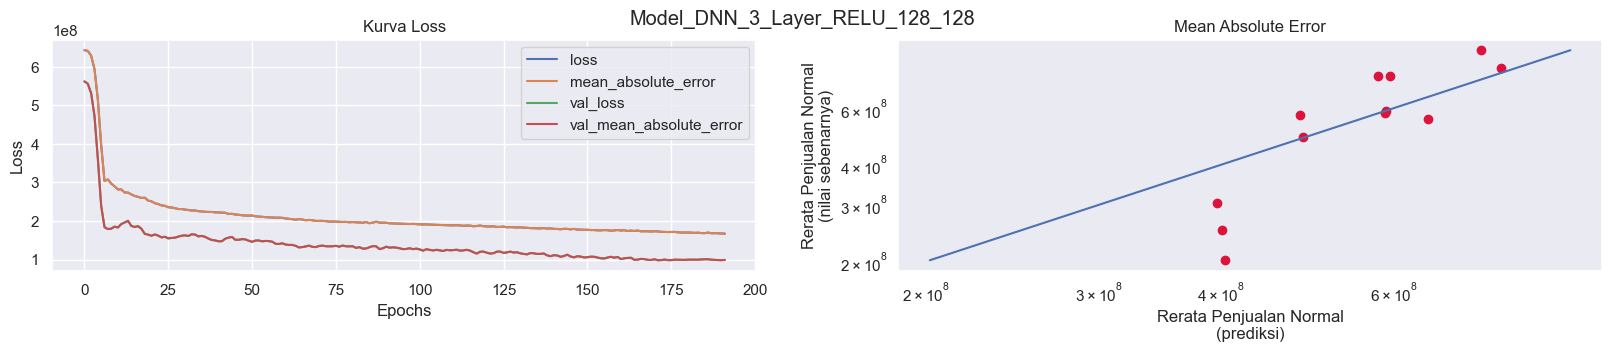

Model: "Model_DNN_3_Layer_RELU_128_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer_1_128_nodes_rel  (None, 128)              896       
 u_activation (Dense)                                            
                                                                 
 dense_layer_2_128_nodes_rel  (None, 128)              16512     
 u_activation (Dense)                                            
                                                                 
 dense_layer_output_1_node_l  (None, 1)                129       
 inear_activation (Dense)                                        
                                                                 
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________
Skor R2: 67.89%
Mean Absolute Error: 98,351,720
Mean Squared Error: 14,707,535,288,946,670


In [42]:
tensorflow = TensorFlow(
  fitur_train=X_train_norm, # type: ignore
  target_train=y_train, # type: ignore
  fitur_test=X_test_norm, # type: ignore
  target_test=y_test, # type: ignore
  es_patience=20,
  epoch=1000
)

# List model yang di-compile
tensorflow_model = [tensorflow.model_dnn_3_layer(16, 16, "Model_DNN_3_Layer_RELU_16_16"),
                    tensorflow.model_dnn_3_layer(32, 16, "Model_DNN_3_Layer_RELU_32_16"),
                    tensorflow.model_dnn_3_layer(32, 32, "Model_DNN_3_Layer_RELU_32_32"), 
                    tensorflow.model_dnn_3_layer(64, 32, "Model_DNN_3_Layer_RELU_64_32"), 
                    tensorflow.model_dnn_3_layer(nama_model="Model_DNN_3_Layer_RELU_64_64"), 
                    tensorflow.model_dnn_3_layer(128, 64, "Model_DNN_3_Layer_RELU_128_64"), 
                    tensorflow.model_dnn_3_layer(128, 128, "Model_DNN_3_Layer_RELU_128_128")]

# List output pelatihan model tensorflow
output_training = []

# Loop fit dan simpan model
for index, model in enumerate(tensorflow_model):
  # Fit setiap model dan simpan di variabel hasil
  hasil = tensorflow.fit_model(model)
  # Simpan evaluasi model
  evaluasi = model.evaluate(X_test_norm, y_test, verbose=0, return_dict=True) # type: ignore
  # Lakukan prediksi model
  prediksi = list(np.concatenate(model.predict(X_test_norm, verbose=0)).flat) # type: ignore
  dict_output_model = {
    "model": model,
    "hasil": hasil,
    "evaluasi": evaluasi,
    "prediksi": prediksi
    }
  print(dict_output_model)
  output_training.append(dict_output_model)
  
# List parameter model
output_param_model = []

# Loop output_training
if len(output_training) != 0:
  for index, output in enumerate(output_training):    
    # newline
    if index != 0:
      print("\n")
    # Subplot
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(3)
    fig.suptitle(f"{output['model'].name}")
    # Subplot 1 Kurva Loss
    pd.DataFrame(output['hasil'].history).plot(ax=ax[0])
    ax[0].set_title("Kurva Loss")
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    # Subplot 2 Mean Absolute Error pada Validation Dataset
    plot_hasil(ax[1], 
              output['prediksi'],
              y_test.tolist(), # type: ignore
              "Rerata Penjualan Normal\n(prediksi)",
              "Rerata Penjualan Normal\n(nilai sebenarnya)")
    plt.show()
    # Struktur model
    output['model'].summary()
    # Parameter output model
    r2 = r2_score(y_test.tolist(), output['prediksi']) # type: ignore
    mae = output['evaluasi']['mean_absolute_error']
    mse = mean_squared_error(y_test.tolist(), output['prediksi']) # type: ignore
    # Print parameter model
    print(f"Skor R2: {'{:,.2%}'.format(r2)}")
    print(f"Mean Absolute Error: {'{:,.0f}'.format(mae)}")
    print(f"Mean Squared Error: {'{:,.0f}'.format(mse)}")
    # Simpan parameter output model dalam dictionary
    dict_param_model = {
      "Nama Model": output['model'].name,
      "Skor R2": r2,
      "Mean Absolute Error": mae,
      "Mean Squared Error": mse
    }
    output_param_model.append(dict_param_model)

#### Scikit

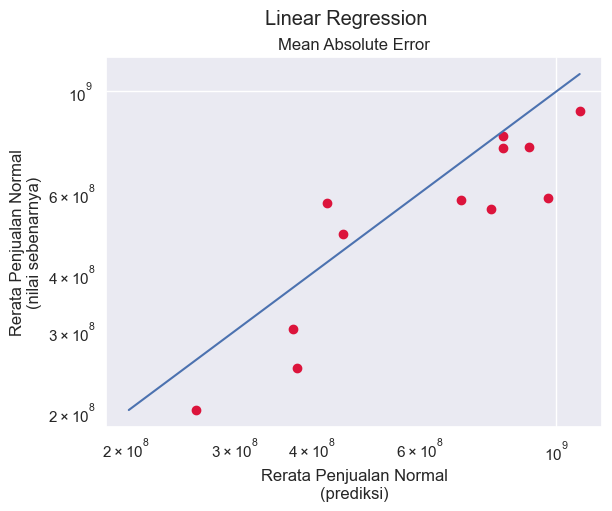

Skor R2: 41.56%
Mean Absolute Error: 132,414,363
Mean Squared Error: 26,764,597,914,684,528


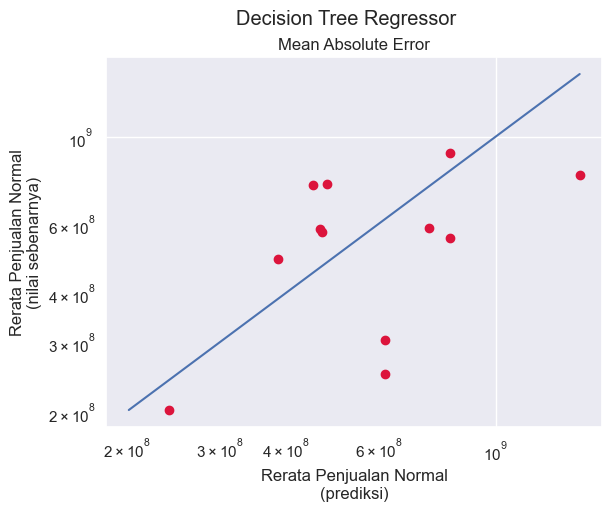

Skor R2: -73.85%
Mean Absolute Error: 231,329,676
Mean Squared Error: 79,618,715,401,028,080


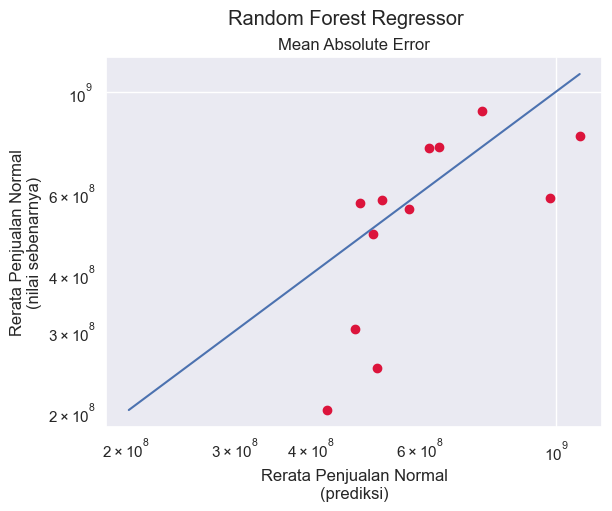

Skor R2: 18.34%
Mean Absolute Error: 159,715,205
Mean Squared Error: 37,396,677,892,797,016


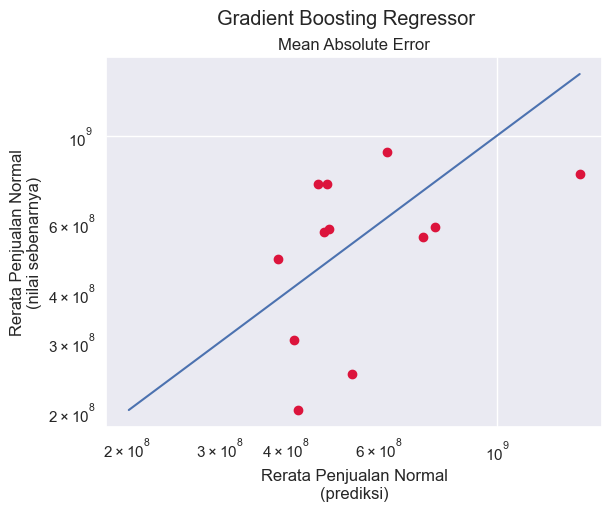

Skor R2: -59.58%
Mean Absolute Error: 229,342,366
Mean Squared Error: 73,086,097,410,592,144


In [43]:
sk = SK(fitur_train=X_train_norm, # type: ignore
        target_train=y_train, # type: ignore
        fitur_test=X_test_norm, # type: ignore
        target_test=y_test) # type: ignore
sk_model = [sk.regresi_linear(), sk.decision_tree(), sk.random_forest(), sk.gradient_boosting()]
# Nama Model
list_nama_model = [
  'Linear Regression',
  'Decision Tree Regressor',
  'Random Forest Regressor',
  'Gradient Boosting Regressor'
  ]
for index, model in enumerate(sk_model):
  hasil = sk.fit_model(model)
  prediksi = hasil.predict(X_test_norm)
  r2 = r2_score(y_test, prediksi)
  mae = mean_absolute_error(y_test, prediksi)
  mse = mean_squared_error(y_test, prediksi)
  fig, ax = plt.subplots()
  plot_hasil(ax,
             prediksi,
             y_test.tolist(), # type: ignore
             "Rerata Penjualan Normal\n(prediksi)",
             "Rerata Penjualan Normal\n(nilai sebenarnya)")
  fig.suptitle(list_nama_model[index])
  plt.show()
  print(f"Skor R2: {'{:,.2%}'.format(r2)}")
  print(f"Mean Absolute Error: {'{:,.0f}'.format(mae)}")
  print(f"Mean Squared Error: {'{:,.0f}'.format(mse)}")
  # Simpan parameter output model dalam dictionary
  dict_param_model = {
    "Nama Model": list_nama_model[index],
    "Skor R2": r2,
    "Mean Absolute Error": mae,
    "Mean Squared Error": mse
  }
  output_param_model.append(dict_param_model)

#### LightGBM dan XGBoost

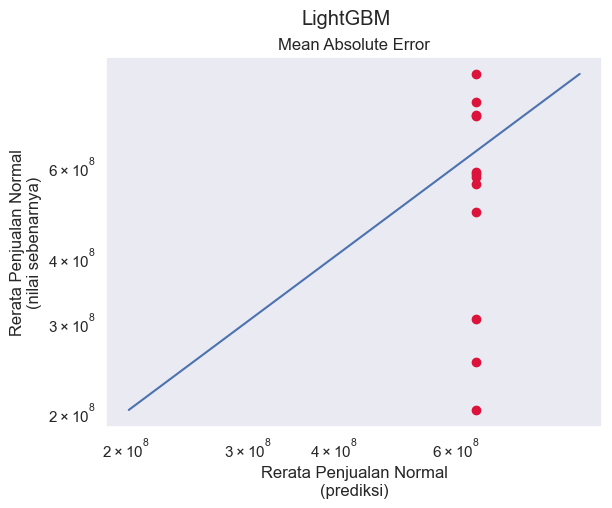

Skor R2: -14.14%
Mean Absolute Error: 187,573,793
Mean Squared Error: 52,275,226,838,743,352


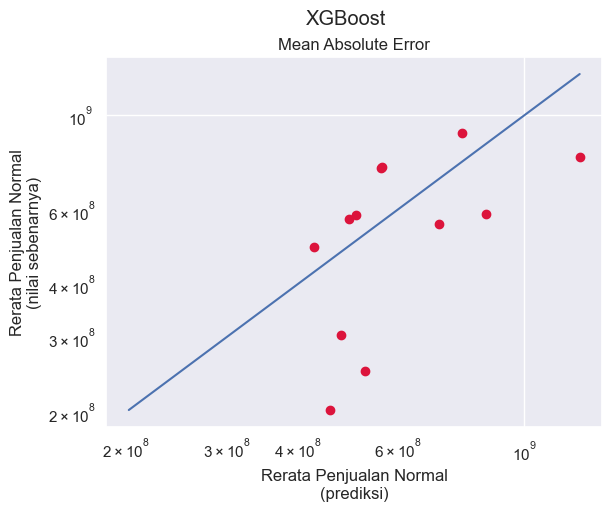

Skor R2: -5.46%
Mean Absolute Error: 192,488,153
Mean Squared Error: 48,299,971,000,905,088


In [44]:
ensemble = EnsembleModel(fitur_train=X_train_norm, # type: ignore
                         target_train=y_train, # type: ignore
                         fitur_test=X_test_norm, # type: ignore
                         target_test=y_test) # type: ignore
ensemble_model = [ensemble.lgbm(), ensemble.xgb()]
# Nama Model
list_nama_model = [
  'LightGBM',
  'XGBoost'
  ]
for index, model in enumerate(ensemble_model):
  hasil = ensemble.fit_model(model)
  prediksi = hasil.predict(X_test_norm)
  r2 = r2_score(y_test, prediksi)
  mae = mean_absolute_error(y_test, prediksi)
  mse = mean_squared_error(y_test, prediksi)
  fig, ax = plt.subplots()
  plot_hasil(ax,
             prediksi,
             y_test.tolist(), # type: ignore
             "Rerata Penjualan Normal\n(prediksi)",
             "Rerata Penjualan Normal\n(nilai sebenarnya)")
  fig.suptitle(list_nama_model[index])
  plt.show()
  print(f"Skor R2: {'{:,.2%}'.format(r2)}")
  print(f"Mean Absolute Error: {'{:,.0f}'.format(mae)}")
  print(f"Mean Squared Error: {'{:,.0f}'.format(mse)}")
  # Simpan parameter output model dalam dictionary
  dict_param_model = {
    "Nama Model": "LightGBM" if index == 0 else "XGBoost",
    "Skor R2": r2,
    "Mean Absolute Error": mae,
    "Mean Squared Error": mse
  }
  output_param_model.append(dict_param_model)

## Kesimpulan

In [45]:
# Buat nama kolom
list_nama_kolom = ['Skor R2', 'Mean Absolute Error', 'Mean Squared Error']
# Ekstrak nama model dari output_param_model
list_nama_model = [model['Nama Model'] for model in output_param_model]
# Ekstrak nilai output param masing - masing model
# Loop berdasar nama model
list_parameter_model = []
for indeks in range(len(list_nama_model)):
  # ambil r2, mae dan mse
  list_parameter_model.append([
    output_param_model[indeks]['Skor R2'],
    output_param_model[indeks]['Mean Absolute Error'],
    output_param_model[indeks]['Mean Squared Error']
    ])
# Buat dataframe kesimpulan
df_kesimpulan = pd.DataFrame(list_parameter_model, 
                             columns=list_nama_kolom, 
                             index=list_nama_model)

# Print model terbaik untuk masing - masing kategori
r2_terbaik, mae_terbaik, mse_terbaik = (
  df_kesimpulan[list_nama_kolom[0]].idxmax(),
  df_kesimpulan[list_nama_kolom[1]].idxmin(),
  df_kesimpulan[list_nama_kolom[2]].idxmin()
  )
print(f"Model dengan {list_nama_kolom[0]} terbaik:\t\t\t\t{r2_terbaik}")
print(f"Model dengan {list_nama_kolom[1]} terbaik:\t\t{mae_terbaik}")
print(f"Model dengan {list_nama_kolom[2]} terbaik:\t\t{mse_terbaik}\n")

# Formatting dataframe dan tampilkan df_kesimpulan
df_kesimpulan[list_nama_kolom[0]] = df_kesimpulan[list_nama_kolom[0]].map('{:,.2%}'.format)
df_kesimpulan[list_nama_kolom[1]] = df_kesimpulan[list_nama_kolom[1]].map('{:,.0f}'.format)
df_kesimpulan[list_nama_kolom[2]] = df_kesimpulan[list_nama_kolom[2]].map('{:,.0f}'.format)
print(df_kesimpulan.to_string())

Model dengan Skor R2 terbaik:				Model_DNN_3_Layer_RELU_128_128
Model dengan Mean Absolute Error terbaik:		Model_DNN_3_Layer_RELU_128_128
Model dengan Mean Squared Error terbaik:		Model_DNN_3_Layer_RELU_128_128

                                Skor R2 Mean Absolute Error      Mean Squared Error
Model_DNN_3_Layer_RELU_16_16     18.76%         152,920,048  37,206,360,732,798,984
Model_DNN_3_Layer_RELU_32_16     18.33%         153,157,360  37,402,867,703,144,856
Model_DNN_3_Layer_RELU_32_32     18.19%         152,819,664  37,466,575,157,128,992
Model_DNN_3_Layer_RELU_64_32     17.60%         154,426,992  37,735,468,492,580,784
Model_DNN_3_Layer_RELU_64_64     18.73%         153,648,688  37,217,951,766,727,792
Model_DNN_3_Layer_RELU_128_64    43.61%         132,501,824  25,824,907,242,788,144
Model_DNN_3_Layer_RELU_128_128   67.89%          98,351,720  14,707,535,288,946,670
Linear Regression                41.56%         132,414,363  26,764,597,914,684,528
Decision Tree Regressor         

Berdasarkan hasil akhir dari setiap model yang sudah melalu proses pelatihan dalam jaringan saraf tiruan diatas, kita dapat menyimpulkan bahwa `Model_DNN_3_Layer_RELU_128_128` adalah model dengan performa terbaik diantara model-model dalam pelatihan jaringan saraf tiruan untuk semua kategori parameter evaluasi Skor R2, MAE dan MSE.

Untuk implementasi model ini ke dalam aplikasi ke depannya, kita akan melakukan konversi model terbaik dari format `protobuf (.pb)` menjadi `tensorflow lite (.tlite)` untuk disisipkan pada aplikasi dan melakukan inferensi terhadap input dari user.

In [46]:
# Konverter
konverter = tf.lite.TFLiteConverter.from_saved_model(os.path.join(os.getcwd(), f"model/{mae_terbaik}"))
konverter.target_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS] # type: ignore
konverter.allow_custom_ops = True
konverter.experimental_new_converter = True
tflite_model = konverter.convert()

# Simpan model
with open('model/aplikasi/model.tflite', 'wb') as f:
  f.write(tflite_model)